**2.8. Итоговое задание**

**Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. **

**Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.**

**И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. **

In [351]:
!pip install https://github.com/ipython-contrib/jupyter_contrib_nbextensions/tarball/master
!jupyter contrib nbextension install --user


  Using cached https://github.com/ipython-contrib/jupyter_contrib_nbextensions/tarball/master
[I 14:43:35 InstallContribNbextensionsApp] jupyter contrib nbextension install --user
[I 14:43:35 InstallContribNbextensionsApp] Installing jupyter_contrib_nbextensions nbextension files to jupyter data directory
[I 14:43:35 InstallContribNbextensionsApp] Installing /usr/local/lib/python3.7/dist-packages/jupyter_contrib_nbextensions/nbextensions/tree-filter -> tree-filter
[I 14:43:35 InstallContribNbextensionsApp] Up to date: /root/.local/share/jupyter/nbextensions/tree-filter/demo.gif
[I 14:43:35 InstallContribNbextensionsApp] Up to date: /root/.local/share/jupyter/nbextensions/tree-filter/tree-filter.yaml
[I 14:43:35 InstallContribNbextensionsApp] Up to date: /root/.local/share/jupyter/nbextensions/tree-filter/index.js
[I 14:43:35 InstallContribNbextensionsApp] Up to date: /root/.local/share/jupyter/nbextensions/tree-filter/readme.md
[I 14:43:35 InstallContribNbextensionsApp] - Validating: O

Описание датасета: переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

**Порядок выполнения проекта:**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [496]:
#загрузка датасета для обработки и анализа

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')
#print(stud)
display(stud.head(5))
stud.info()

stud.loc[:, ['studytime, granular']].describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

,"studytime, granular"
count,388.000000
mean,-6.115979
std,2.526235
min,-12.000000
25%,-6.000000
50%,-6.000000
75%,-3.000000
max,-3.000000


**1. Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.**

In [497]:
#переименование столбцов

stud.columns=['school','sex','age','address','famsize',
'Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime',
'studytime','failures','schoolsup','famsup','paid','activities','nursery',
'granular','higher','internet','romantic','famrel','freetime','goout',
'health','absences','score']

display(stud.head(5))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


Проверяем каждый столбец датасета

In [498]:
#проверка каждого столбца
print(stud.school.nunique())
#plt.plot(stud.school) #выбросов, пропусков нет; всего два типа школ - GP и MS
pd.DataFrame(stud.school.value_counts())

2


,school
GP,349
MS,46


In [499]:
#проверка каждого столбца
#sex
print(stud.sex.nunique())
pd.DataFrame(stud.sex.value_counts())

2


,sex
F,208
M,187


In [500]:
#age
print(stud.age.nunique())
pd.DataFrame(stud.age.value_counts())
#stud.age.describe() #выбросов, пропусков нет, вместо 395 - 395 столбцов
#plt.plot(stud.age)

8


,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


In [505]:
#address
print(stud.address.nunique())
#выбросов, пропуски есть, вместо 395 - 378 столбцов
pd.DataFrame(stud.address.value_counts())
#stud.address.describe()


2


,address
U,295
R,83


In [506]:
#famsize
print(stud.famsize.nunique())
#выбросов, пропуски есть, вместо 395 - 368 столбцов
pd.DataFrame(stud.famsize.value_counts())
stud.famsize.describe()

2


count     368
unique      2
top       GT3
freq      261
Name: famsize, dtype: object

In [507]:
#Pstatus
print(stud.Pstatus.nunique())
#выбросов, пропуски есть, вместо 395 - 350 столбцов
pd.DataFrame(stud.Pstatus.value_counts())
stud.Pstatus.describe()

2


count     350
unique      2
top         T
freq      314
Name: Pstatus, dtype: object

In [508]:
#Medu
print(stud.Medu.nunique())
#выбросов, пропуски есть, вместо 395 - 392 столбцов
pd.DataFrame(stud.Medu.value_counts())
stud.Medu.describe()

5


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

In [509]:
#Fedu
print(stud.Fedu.nunique())
#выбросов, пропуски есть, вместо 395 - 371 столбцов
pd.DataFrame(stud.Fedu.value_counts())
stud.Fedu.describe()

6


count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

In [510]:
#Mjob
print(stud.Mjob.nunique())
#выбросов, пропуски есть, вместо 395 - 376 столбцов
pd.DataFrame(stud.Mjob.value_counts())
stud.Mjob.describe()

5


count       376
unique        5
top       other
freq        133
Name: Mjob, dtype: object

In [511]:
#Fjob
print(stud.Fjob.nunique())
#выбросов, пропуски есть, вместо 395 - 359 столбцов
pd.DataFrame(stud.Fjob.value_counts())
stud.Fjob.describe()

5


count       359
unique        5
top       other
freq        197
Name: Fjob, dtype: object

In [512]:
#reason
print(stud.reason.nunique())
#выбросов, пропуски есть, вместо 395 - 378 столбцов
pd.DataFrame(stud.reason.value_counts())
stud.reason.describe()

4


count        378
unique         4
top       course
freq         137
Name: reason, dtype: object

In [513]:
#guardian
print(stud.guardian.nunique())
#выбросов, пропуски есть, вместо 395 - 364 столбцов
pd.DataFrame(stud.guardian.value_counts())
stud.guardian.describe()

3


count        364
unique         3
top       mother
freq         250
Name: guardian, dtype: object

In [514]:
#traveltime
print(stud.traveltime.nunique())
#выбросов, пропуски есть, вместо 395 - 367 столбцов
pd.DataFrame(stud.traveltime.value_counts())
stud.traveltime.describe()

4


count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

In [515]:
#studytime
print(stud.studytime.nunique())
#выбросов, пропуски есть, вместо 395 - 388 столбцов
pd.DataFrame(stud.studytime.value_counts())
stud.studytime.describe()

4


count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

In [516]:
#failures
print(stud.failures.nunique())
#выбросов, пропуски есть, вместо 395 - 373 столбцов
pd.DataFrame(stud.failures.value_counts())
stud.failures.describe()

4


count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

In [517]:
#schoolsup
print(stud.schoolsup.nunique())
#выбросов, пропуски есть, вместо 395 - 386 столбцов
pd.DataFrame(stud.schoolsup.value_counts())
stud.schoolsup.describe()

2


count     386
unique      2
top        no
freq      335
Name: schoolsup, dtype: object

In [518]:
#famsup
print(stud.famsup.nunique())
#выбросов, пропуски есть, вместо 395 - 356 столбцов
pd.DataFrame(stud.famsup.value_counts())
stud.famsup.describe()

2


count     356
unique      2
top       yes
freq      219
Name: famsup, dtype: object

In [519]:
#paid
print(stud.paid.nunique())
#выбросов, пропуски есть, вместо 395 - 355 столбцов
pd.DataFrame(stud.paid.value_counts())
stud.paid.describe()

2


count     355
unique      2
top        no
freq      200
Name: paid, dtype: object

In [520]:
#activities
print(stud.activities.nunique())
#выбросов, пропуски есть, вместо 395 - 381 столбцов
pd.DataFrame(stud.activities.value_counts())
stud.activities.describe()

2


count     381
unique      2
top       yes
freq      195
Name: activities, dtype: object

In [521]:
#nursery
print(stud.nursery.nunique())
#выбросов, пропуски есть, вместо 395 - 379 столбцов
pd.DataFrame(stud.nursery.value_counts())
stud.nursery.describe()

2


count     379
unique      2
top       yes
freq      300
Name: nursery, dtype: object

In [522]:
#granular
print(stud.granular.nunique())
#выбросов, пропуски есть, вместо 395 - 388 столбцов
pd.DataFrame(stud.granular.value_counts())
stud.granular.describe()

4


count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: granular, dtype: float64

In [523]:
#higher
print(stud.higher.nunique())
#выбросов, пропуски есть, вместо 395 - 375 столбцов
pd.DataFrame(stud.higher.value_counts())
stud.higher.describe()

2


count     375
unique      2
top       yes
freq      356
Name: higher, dtype: object

In [524]:
#internet
print(stud.internet.nunique())
#выбросов, пропуски есть, вместо 395 - 361 столбцов
pd.DataFrame(stud.internet.value_counts())
stud.internet.describe()

2


count     361
unique      2
top       yes
freq      305
Name: internet, dtype: object

In [525]:
#romantic
print(stud.romantic.nunique())
#выбросов, пропуски есть, вместо 395 - 364 столбцов
pd.DataFrame(stud.romantic.value_counts())
stud.romantic.describe()

2


count     364
unique      2
top        no
freq      240
Name: romantic, dtype: object

In [526]:
#famrel
print(stud.famrel.nunique())
#выбросов, пропуски есть, вместо 395 - 368 столбцов
pd.DataFrame(stud.famrel.value_counts())
stud.famrel.describe()

6


count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

In [527]:
#freetime
print(stud.freetime.nunique())
#выбросов, пропуски есть, вместо 395 - 384 столбцов
pd.DataFrame(stud.freetime.value_counts())
stud.freetime.describe()

5


count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

In [528]:
#goout
print(stud.goout.nunique())
#выбросов, пропуски есть, вместо 395 - 387 столбцов
pd.DataFrame(stud.goout.value_counts())
stud.goout.describe()

5


count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

In [529]:
#health
print(stud.health.nunique())
#выбросов, пропуски есть, вместо 395 - 380 столбцов
pd.DataFrame(stud.health.value_counts())
stud.health.describe()

5


count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

In [530]:
#absences
print(stud.absences.nunique())
#выбросов, пропуски есть, вместо 395 - 383 столбцов
pd.DataFrame(stud.absences.value_counts())
stud.absences.describe()

36


count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

In [531]:
#score
print(stud.score.nunique())
#выбросов, пропуски есть, вместо 395 - 389 столбцов
pd.DataFrame(stud.score.value_counts())
stud.score.describe()

18


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Фильтрация, заполнение и удаление датасета

In [532]:
# сохраняем резервную копию датасета в stud_restore

stud_restore=stud
#display(stud_restore.head(5))
stud_restore.describe()
stud_restore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   Pstatus     350 non-null    object 
 6   Medu        392 non-null    float64
 7   Fedu        371 non-null    float64
 8   Mjob        376 non-null    object 
 9   Fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

In [540]:
#отфильтруем пропуски; оставим только заполненные данные
stud_1=stud
stud_1.address = stud_1.address.astype(str).apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

stud_1 = stud_1.drop(stud_1[stud_1.address == 'None'].index)

display(pd.DataFrame(stud_1.address.value_counts()))
print("Значений, встретившихся в столбце более 1 раз:"#Число 1 взято для ориентира, можно брать другое
      , (stud_1.address.value_counts()>1).sum())

stud_1.loc[:, ['address']].info() 
stud_1.info()

,address
U,295
R,83


Значений, встретившихся в столбце более 1 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      378 non-null    object 
 1   sex         378 non-null    object 
 2   age         378 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     352 non-null    object 
 5   Pstatus     334 non-null    object 
 6   Medu        376 non-null    float64
 7   Fedu        355 non-null    float64
 8   Mjob        359 non-null    object 
 9   Fjob        343 non-null    object 
 10  reason      361 non-null    object 
 11  guardian    348 non-null    object 
 12  traveltime  

In [542]:
#отфильтруем пропуски; оставим только заполненные данные
stud_1.famsize = stud_1.famsize.astype(str).apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

stud_1 = stud_1.drop(stud_1[stud_1.famsize == 'None'].index)

display(pd.DataFrame(stud_1.famsize.value_counts()))
print("Значений, встретившихся в столбце более 1 раз:"#Число 1 взято для ориентира, можно брать другое
      , (stud_1.famsize.value_counts()>1).sum())

stud_1.loc[:, ['famsize']].info() 
stud_1.info()

,famsize
GT3,251
LE3,101


Значений, встретившихся в столбце более 1 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 1 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  352 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 1 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      352 non-null    object 
 1   sex         352 non-null    object 
 2   age         352 non-null    int64  
 3   address     352 non-null    object 
 4   famsize     352 non-null    object 
 5   Pstatus     312 non-null    object 
 6   Medu        350 non-null    float64
 7   Fedu        331 non-null    float64
 8   Mjob        335 non-null    object 
 9   Fjob        317 non-null    object 
 10  reason      335 non-null    object 
 11  guardian    324 non-null    object 
 12  traveltime  

In [544]:
#отфильтруем пропуски; оставим только заполненные данные
stud_1.Pstatus = stud_1.Pstatus.astype(str).apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

stud_1 = stud_1.drop(stud_1[stud_1.Pstatus == 'None'].index)

display(pd.DataFrame(stud_1.Pstatus.value_counts()))
print("Значений, встретившихся в столбце более 1 раз:"#Число 1 взято для ориентира, можно брать другое
      , (stud_1.Pstatus.value_counts()>1).sum())

stud_1.loc[:, ['Pstatus']].info() 
stud_1.info()

,Pstatus
T,281
A,31


Значений, встретившихся в столбце более 1 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 2 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  312 non-null    object
dtypes: object(1)
memory usage: 4.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 2 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      312 non-null    object 
 1   sex         312 non-null    object 
 2   age         312 non-null    int64  
 3   address     312 non-null    object 
 4   famsize     312 non-null    object 
 5   Pstatus     312 non-null    object 
 6   Medu        312 non-null    float64
 7   Fedu        292 non-null    float64
 8   Mjob        299 non-null    object 
 9   Fjob        279 non-null    object 
 10  reason      298 non-null    object 
 11  guardian    286 non-null    object 
 12  traveltime  

In [548]:
#отфильтруем пропуски; оставим только заполненные данные
stud_1.Medu = stud_1.Medu.astype(str).apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

stud_1 = stud_1.drop(stud_1[stud_1.Medu == 'None'].index)

stud_1.Medu = stud_1.Medu.astype(float)

display(pd.DataFrame(stud_1.Medu.value_counts()))
print("Значений, встретившихся в столбце более 1 раз:"#Число 1 взято для ориентира, можно брать другое
      , (stud_1.Medu.value_counts()>1).sum())

stud_1.loc[:, ['Medu']].info()
stud_1.info()

,Medu
4.0,107
3.0,79
2.0,77
1.0,46
0.0,3


Значений, встретившихся в столбце более 1 раз: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 2 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    312 non-null    float64
dtypes: float64(1)
memory usage: 14.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 2 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      312 non-null    object 
 1   sex         312 non-null    object 
 2   age         312 non-null    int64  
 3   address     312 non-null    object 
 4   famsize     312 non-null    object 
 5   Pstatus     312 non-null    object 
 6   Medu        312 non-null    float64
 7   Fedu        292 non-null    float64
 8   Mjob        299 non-null    object 
 9   Fjob        279 non-null    object 
 10  reason      298 non-null    object 
 11  guardian    286 non-null    object 
 12  traveltime 

In [552]:
#отфильтруем пропуски; оставим только заполненные данные
stud_1.Fedu = stud_1.Fedu.astype(str).apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

stud_1.loc[stud_1.Fedu.astype(str)=='40.0', 'Fedu'] = 4.0 #исправляем опечатку: вместо '40.0' подставляем '4.0'

stud_1 = stud_1.drop(stud_1[stud_1.Fedu == 'None'].index)

stud_1.Fedu = stud_1.Fedu.astype(float)

display(pd.DataFrame(stud_1.Fedu.value_counts()))
print("Значений, встретившихся в столбце более 1 раз:"#Число 1 взято для ориентира, можно брать другое
      , (stud_1.Fedu.value_counts()>1).sum())

stud_1.loc[:, ['Fedu']].info()
stud_1.info()

,Fedu
2.0,86
3.0,76
4.0,72
1.0,57
0.0,1


Значений, встретившихся в столбце более 1 раз: 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 2 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    292 non-null    float64
dtypes: float64(1)
memory usage: 4.6 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 2 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      292 non-null    object 
 1   sex         292 non-null    object 
 2   age         292 non-null    int64  
 3   address     292 non-null    object 
 4   famsize     292 non-null    object 
 5   Pstatus     292 non-null    object 
 6   Medu        292 non-null    float64
 7   Fedu        292 non-null    float64
 8   Mjob        279 non-null    object 
 9   Fjob        261 non-null    object 
 10  reason      279 non-null    object 
 11  guardian    267 non-null    object 
 12  traveltime  

In [554]:
#отфильтруем пропуски; оставим только заполненные данные
stud_1.Mjob = stud_1.Mjob.astype(str).apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

stud_1 = stud_1.drop(stud_1[stud_1.Mjob == 'None'].index)

display(pd.DataFrame(stud_1.Mjob.value_counts()))
print("Значений, встретившихся в столбце более 1 раз:"#Число 1 взято для ориентира, можно брать другое
      , (stud_1.Mjob.value_counts()>1).sum())

stud_1.loc[:, ['Mjob']].info()
stud_1.info()

,Mjob
other,101
services,73
at_home,43
teacher,37
health,25


Значений, встретившихся в столбце более 1 раз: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 2 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    279 non-null    object
dtypes: object(1)
memory usage: 4.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 2 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      279 non-null    object 
 1   sex         279 non-null    object 
 2   age         279 non-null    int64  
 3   address     279 non-null    object 
 4   famsize     279 non-null    object 
 5   Pstatus     279 non-null    object 
 6   Medu        279 non-null    float64
 7   Fedu        279 non-null    float64
 8   Mjob        279 non-null    object 
 9   Fjob        249 non-null    object 
 10  reason      266 non-null    object 
 11  guardian    255 non-null    object 
 12  traveltime  264

In [556]:
#отфильтруем пропуски; оставим только заполненные данные
stud_1.Fjob = stud_1.Fjob.astype(str).apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

stud_1 = stud_1.drop(stud_1[stud_1.Fjob == 'None'].index)

display(pd.DataFrame(stud_1.Fjob.value_counts()))
print("Значений, встретившихся в столбце более 1 раз:"#Число 1 взято для ориентира, можно брать другое
      , (stud_1.Fjob.value_counts()>1).sum())

stud_1.loc[:, ['Fjob']].info()
stud_1.info()

,Fjob
other,133
services,74
teacher,21
health,12
at_home,9


Значений, встретившихся в столбце более 1 раз: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 2 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    249 non-null    object
dtypes: object(1)
memory usage: 3.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 2 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      249 non-null    object 
 1   sex         249 non-null    object 
 2   age         249 non-null    int64  
 3   address     249 non-null    object 
 4   famsize     249 non-null    object 
 5   Pstatus     249 non-null    object 
 6   Medu        249 non-null    float64
 7   Fedu        249 non-null    float64
 8   Mjob        249 non-null    object 
 9   Fjob        249 non-null    object 
 10  reason      238 non-null    object 
 11  guardian    226 non-null    object 
 12  traveltime  238

In [558]:
#отфильтруем пропуски; оставим только заполненные данные
stud_1.reason = stud_1.reason.astype(str).apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

stud_1 = stud_1.drop(stud_1[stud_1.reason == 'None'].index)

display(pd.DataFrame(stud_1.reason.value_counts()))
print("Значений, встретившихся в столбце более 1 раз:"#Число 1 взято для ориентира, можно брать другое
      , (stud_1.reason.value_counts()>1).sum())

stud_1.loc[:, ['reason']].info()
stud_1.info()

,reason
course,90
home,61
reputation,60
other,27


Значений, встретившихся в столбце более 1 раз: 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 2 to 393
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  238 non-null    object
dtypes: object(1)
memory usage: 3.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 2 to 393
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      238 non-null    object 
 1   sex         238 non-null    object 
 2   age         238 non-null    int64  
 3   address     238 non-null    object 
 4   famsize     238 non-null    object 
 5   Pstatus     238 non-null    object 
 6   Medu        238 non-null    float64
 7   Fedu        238 non-null    float64
 8   Mjob        238 non-null    object 
 9   Fjob        238 non-null    object 
 10  reason      238 non-null    object 
 11  guardian    216 non-null    object 
 12  traveltime  227

In [560]:
#отфильтруем пропуски; оставим только заполненные данные
stud_1.guardian = stud_1.guardian.astype(str).apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

stud_1 = stud_1.drop(stud_1[stud_1.guardian == 'None'].index)

display(pd.DataFrame(stud_1.guardian.value_counts()))
print("Значений, встретившихся в столбце более 1 раз:"#Число 1 взято для ориентира, можно брать другое
      , (stud_1.guardian.value_counts()>1).sum())

stud_1.loc[:, ['guardian']].info()
stud_1.info()

,guardian
mother,148
father,51
other,17


Значений, встретившихся в столбце более 1 раз: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 2 to 393
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  216 non-null    object
dtypes: object(1)
memory usage: 3.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 2 to 393
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      216 non-null    object 
 1   sex         216 non-null    object 
 2   age         216 non-null    int64  
 3   address     216 non-null    object 
 4   famsize     216 non-null    object 
 5   Pstatus     216 non-null    object 
 6   Medu        216 non-null    float64
 7   Fedu        216 non-null    float64
 8   Mjob        216 non-null    object 
 9   Fjob        216 non-null    object 
 10  reason      216 non-null    object 
 11  guardian    216 non-null    object 
 12  traveltim

In [570]:
#отфильтруем пропуски; оставим только заполненные данные
stud_1.traveltime = stud_1.traveltime.astype(str).apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

stud_1 = stud_1.drop(stud_1[stud_1.traveltime == 'None'].index)

stud_1.traveltime = stud_1.traveltime.astype(float)

display(pd.DataFrame(stud_1.traveltime.value_counts()))
print("Значений, встретившихся в столбце более 1 раз:"#Число 1 взято для ориентира, можно брать другое
      , (stud_1.traveltime.value_counts()>1).sum())

stud_1.loc[:, ['traveltime']].info()
stud_1.info()

,traveltime
1.0,134
2.0,57
3.0,12
4.0,3


Значений, встретившихся в столбце более 1 раз: 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 2 to 393
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  206 non-null    float64
dtypes: float64(1)
memory usage: 13.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 2 to 393
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      206 non-null    object 
 1   sex         206 non-null    object 
 2   age         206 non-null    int64  
 3   address     206 non-null    object 
 4   famsize     206 non-null    object 
 5   Pstatus     206 non-null    object 
 6   Medu        206 non-null    float64
 7   Fedu        206 non-null    float64
 8   Mjob        206 non-null    object 
 9   Fjob        206 non-null    object 
 10  reason      206 non-null    object 
 11  guardian    206 non-null    object 
 12 

In [574]:
#отфильтруем пропуски; оставим только заполненные данные
stud_1.studytime = stud_1.studytime.astype(str).apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

stud_1 = stud_1.drop(stud_1[stud_1.studytime == 'None'].index)

stud_1.studytime = stud_1.studytime.astype(float)

display(pd.DataFrame(stud_1.studytime.value_counts()))
print("Значений, встретившихся в столбце более 1 раз:"#Число 1 взято для ориентира, можно брать другое
      , (stud.studytime.value_counts()>1).sum())

stud_1.loc[:, ['studytime']].info()
stud_1.info()

,studytime
2.0,107
1.0,55
3.0,28
4.0,14


Значений, встретившихся в столбце более 1 раз: 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 2 to 393
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  204 non-null    float64
dtypes: float64(1)
memory usage: 13.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 2 to 393
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      204 non-null    object 
 1   sex         204 non-null    object 
 2   age         204 non-null    int64  
 3   address     204 non-null    object 
 4   famsize     204 non-null    object 
 5   Pstatus     204 non-null    object 
 6   Medu        204 non-null    float64
 7   Fedu        204 non-null    float64
 8   Mjob        204 non-null    object 
 9   Fjob        204 non-null    object 
 10  reason      204 non-null    object 
 11  guardian    204 non-null    object 
 12  tr

In [580]:
#отфильтруем пропуски; оставим только заполненные данные
stud_1.failures = stud_1.failures.astype(str).apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

stud_1 = stud_1.drop(stud_1[stud_1.failures == 'None'].index)

stud_1.failures = stud_1.failures.astype(float)

display(pd.DataFrame(stud_1.failures.value_counts()))
print("Значений, встретившихся в столбце более 1 раз:"#Число 1 взято для ориентира, можно брать другое
      , (stud_1.failures.value_counts()>1).sum())

stud_1.loc[:, ['failures']].info()
stud_1.info()

,failures
0.0,160
1.0,24
3.0,7
2.0,5


Значений, встретившихся в столбце более 1 раз: 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 2 to 393
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  196 non-null    float64
dtypes: float64(1)
memory usage: 8.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 2 to 393
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      196 non-null    object 
 1   sex         196 non-null    object 
 2   age         196 non-null    int64  
 3   address     196 non-null    object 
 4   famsize     196 non-null    object 
 5   Pstatus     196 non-null    object 
 6   Medu        196 non-null    float64
 7   Fedu        196 non-null    float64
 8   Mjob        196 non-null    object 
 9   Fjob        196 non-null    object 
 10  reason      196 non-null    object 
 11  guardian    196 non-null    object 
 12  travel

In [585]:
#отфильтруем пропуски; оставим только заполненные данные
stud_1.schoolsup = stud_1.schoolsup.astype(str).apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

stud_1 = stud_1.drop(stud_1[stud_1.schoolsup == 'None'].index)

display(pd.DataFrame(stud_1.schoolsup.value_counts()))
print("Значений, встретившихся в столбце более 1 раз:"#Число 1 взято для ориентира, можно брать другое
      , (stud_1.schoolsup.value_counts()>1).sum())

stud_1.loc[:, ['schoolsup']].info()
stud_1.info()

,schoolsup
no,163
yes,29


Значений, встретившихся в столбце более 1 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 2 to 393
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  192 non-null    object
dtypes: object(1)
memory usage: 3.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 2 to 393
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      192 non-null    object 
 1   sex         192 non-null    object 
 2   age         192 non-null    int64  
 3   address     192 non-null    object 
 4   famsize     192 non-null    object 
 5   Pstatus     192 non-null    object 
 6   Medu        192 non-null    float64
 7   Fedu        192 non-null    float64
 8   Mjob        192 non-null    object 
 9   Fjob        192 non-null    object 
 10  reason      192 non-null    object 
 11  guardian    192 non-null    object 
 12  travel

In [587]:
#отфильтруем пропуски; оставим только заполненные данные
stud_1.famsup = stud_1.famsup.astype(str).apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

stud_1 = stud_1.drop(stud_1[stud_1.famsup == 'None'].index)

display(pd.DataFrame(stud_1.famsup.value_counts()))
print("Значений, встретившихся в столбце более 1 раз:"#Число 1 взято для ориентира, можно брать другое
      , (stud_1.famsup.value_counts()>1).sum())

stud_1.loc[:, ['famsup']].info()
stud_1.info()

,famsup
yes,109
no,69


Значений, встретившихся в столбце более 1 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 2 to 393
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  178 non-null    object
dtypes: object(1)
memory usage: 2.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 2 to 393
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      178 non-null    object 
 1   sex         178 non-null    object 
 2   age         178 non-null    int64  
 3   address     178 non-null    object 
 4   famsize     178 non-null    object 
 5   Pstatus     178 non-null    object 
 6   Medu        178 non-null    float64
 7   Fedu        178 non-null    float64
 8   Mjob        178 non-null    object 
 9   Fjob        178 non-null    object 
 10  reason      178 non-null    object 
 11  guardian    178 non-null    object 
 12  traveltime  178

In [589]:
#отфильтруем пропуски; оставим только заполненные данные
stud_1.paid = stud_1.paid.astype(str).apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

stud_1 = stud_1.drop(stud_1[stud_1.paid == 'None'].index)

display(pd.DataFrame(stud_1.paid.value_counts()))
print("Значений, встретившихся в столбце более 1 раз:"#Число 1 взято для ориентира, можно брать другое
      , (stud_1.paid.value_counts()>1).sum())

stud_1.loc[:, ['paid']].info()
stud_1.info()

,paid
no,87
yes,72


Значений, встретившихся в столбце более 1 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 4 to 393
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    159 non-null    object
dtypes: object(1)
memory usage: 2.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 4 to 393
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      159 non-null    object 
 1   sex         159 non-null    object 
 2   age         159 non-null    int64  
 3   address     159 non-null    object 
 4   famsize     159 non-null    object 
 5   Pstatus     159 non-null    object 
 6   Medu        159 non-null    float64
 7   Fedu        159 non-null    float64
 8   Mjob        159 non-null    object 
 9   Fjob        159 non-null    object 
 10  reason      159 non-null    object 
 11  guardian    159 non-null    object 
 12  traveltime  159

In [591]:
#отфильтруем пропуски; оставим только заполненные данные
stud_1.activities = stud_1.activities.astype(str).apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

stud_1 = stud_1.drop(stud_1[stud_1.activities == 'None'].index)

display(pd.DataFrame(stud_1.activities.value_counts()))
print("Значений, встретившихся в столбце более 1 раз:"#Число 1 взято для ориентира, можно брать другое
      , (stud_1.activities.value_counts()>1).sum())

stud_1.loc[:, ['activities']].info()
stud_1.info()

,activities
yes,76
no,74


Значений, встретившихся в столбце более 1 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 4 to 391
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  150 non-null    object
dtypes: object(1)
memory usage: 2.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 4 to 391
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      150 non-null    object 
 1   sex         150 non-null    object 
 2   age         150 non-null    int64  
 3   address     150 non-null    object 
 4   famsize     150 non-null    object 
 5   Pstatus     150 non-null    object 
 6   Medu        150 non-null    float64
 7   Fedu        150 non-null    float64
 8   Mjob        150 non-null    object 
 9   Fjob        150 non-null    object 
 10  reason      150 non-null    object 
 11  guardian    150 non-null    object 
 12  tra

In [593]:
#отфильтруем пропуски; оставим только заполненные данные
stud_1.nursery = stud_1.nursery.astype(str).apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

stud_1 = stud_1.drop(stud_1[stud_1.nursery == 'None'].index)

display(pd.DataFrame(stud_1.nursery.value_counts()))
print("Значений, встретившихся в столбце более 1 раз:"#Число 1 взято для ориентира, можно брать другое
      , (stud_1.nursery.value_counts()>1).sum())

stud_1.loc[:, ['nursery']].info()
stud_1.info()

,nursery
yes,114
no,30


Значений, встретившихся в столбце более 1 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 4 to 391
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  144 non-null    object
dtypes: object(1)
memory usage: 2.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 4 to 391
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      144 non-null    object 
 1   sex         144 non-null    object 
 2   age         144 non-null    int64  
 3   address     144 non-null    object 
 4   famsize     144 non-null    object 
 5   Pstatus     144 non-null    object 
 6   Medu        144 non-null    float64
 7   Fedu        144 non-null    float64
 8   Mjob        144 non-null    object 
 9   Fjob        144 non-null    object 
 10  reason      144 non-null    object 
 11  guardian    144 non-null    object 
 12  traveltime  

In [598]:
#отфильтруем пропуски; оставим только заполненные данные
stud_1.granular = stud_1.granular.astype(str).apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

stud_1 = stud_1.drop(stud_1[stud_1.granular == 'None'].index)

stud_1.granular = stud_1.granular.astype(float)

display(pd.DataFrame(stud_1.granular.value_counts()))
print("Значений, встретившихся в столбце более 1 раз:"#Число 1 взято для ориентира, можно брать другое
      , (stud_1.granular.value_counts()>1).sum())

stud_1.loc[:, ['granular']].info()
stud_1.info()

,granular
-6.0,71
-3.0,36
-9.0,25
-12.0,12


Значений, встретившихся в столбце более 1 раз: 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 4 to 391
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   granular  144 non-null    float64
dtypes: float64(1)
memory usage: 7.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 4 to 391
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      144 non-null    object 
 1   sex         144 non-null    object 
 2   age         144 non-null    int64  
 3   address     144 non-null    object 
 4   famsize     144 non-null    object 
 5   Pstatus     144 non-null    object 
 6   Medu        144 non-null    float64
 7   Fedu        144 non-null    float64
 8   Mjob        144 non-null    object 
 9   Fjob        144 non-null    object 
 10  reason      144 non-null    object 
 11  guardian    144 non-null    object 
 12  travel

In [600]:
#отфильтруем пропуски; оставим только заполненные данные
stud_1.higher = stud_1.higher.astype(str).apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

stud_1 = stud_1.drop(stud_1[stud_1.higher == 'None'].index)

display(pd.DataFrame(stud_1.higher.value_counts()))
print("Значений, встретившихся в столбце более 1 раз:"#Число 1 взято для ориентира, можно брать другое
      , (stud_1.higher.value_counts()>1).sum())

stud_1.loc[:, ['higher']].info()
stud_1.info()

,higher
yes,136
no,6


Значений, встретившихся в столбце более 1 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 4 to 391
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  142 non-null    object
dtypes: object(1)
memory usage: 2.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 4 to 391
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      142 non-null    object 
 1   sex         142 non-null    object 
 2   age         142 non-null    int64  
 3   address     142 non-null    object 
 4   famsize     142 non-null    object 
 5   Pstatus     142 non-null    object 
 6   Medu        142 non-null    float64
 7   Fedu        142 non-null    float64
 8   Mjob        142 non-null    object 
 9   Fjob        142 non-null    object 
 10  reason      142 non-null    object 
 11  guardian    142 non-null    object 
 12  traveltime  142

In [602]:
#отфильтруем пропуски; оставим только заполненные данные
stud_1.internet = stud_1.internet.astype(str).apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

stud_1 = stud_1.drop(stud_1[stud_1.internet == 'None'].index)

display(pd.DataFrame(stud_1.internet.value_counts()))
print("Значений, встретившихся в столбце более 1 раз:"#Число 1 взято для ориентира, можно брать другое
      , (stud_1.internet.value_counts()>1).sum())

stud_1.loc[:, ['internet']].info()
stud_1.info()

,internet
yes,109
no,18


Значений, встретившихся в столбце более 1 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 4 to 391
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  127 non-null    object
dtypes: object(1)
memory usage: 2.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 4 to 391
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      127 non-null    object 
 1   sex         127 non-null    object 
 2   age         127 non-null    int64  
 3   address     127 non-null    object 
 4   famsize     127 non-null    object 
 5   Pstatus     127 non-null    object 
 6   Medu        127 non-null    float64
 7   Fedu        127 non-null    float64
 8   Mjob        127 non-null    object 
 9   Fjob        127 non-null    object 
 10  reason      127 non-null    object 
 11  guardian    127 non-null    object 
 12  traveltim

In [604]:
#отфильтруем пропуски; оставим только заполненные данные
stud_1.romantic = stud_1.romantic.astype(str).apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

stud_1 = stud_1.drop(stud_1[stud_1.romantic == 'None'].index)

display(pd.DataFrame(stud_1.romantic.value_counts()))
print("Значений, встретившихся в столбце более 1 раз:"#Число 1 взято для ориентира, можно брать другое
      , (stud_1.romantic.value_counts()>1).sum())

stud_1.loc[:, ['romantic']].info()
stud_1.info()

,romantic
no,75
yes,46


Значений, встретившихся в столбце более 1 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 4 to 391
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  121 non-null    object
dtypes: object(1)
memory usage: 1.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 4 to 391
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      121 non-null    object 
 1   sex         121 non-null    object 
 2   age         121 non-null    int64  
 3   address     121 non-null    object 
 4   famsize     121 non-null    object 
 5   Pstatus     121 non-null    object 
 6   Medu        121 non-null    float64
 7   Fedu        121 non-null    float64
 8   Mjob        121 non-null    object 
 9   Fjob        121 non-null    object 
 10  reason      121 non-null    object 
 11  guardian    121 non-null    object 
 12  traveltim

In [607]:
#отфильтруем пропуски; оставим только заполненные данные
stud_1.famrel = stud_1.famrel.astype(str).apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

stud_1.loc[stud_1.famrel.astype(str)=='-1.0', 'famrel'] = 1.0 #исправляем опечатку: вместо '-1.0' подставляем '1.0'

stud_1 = stud_1.drop(stud_1[stud_1.famrel == 'None'].index)

stud_1.famrel = stud_1.famrel.astype(float)

display(pd.DataFrame(stud_1.famrel.value_counts()))
print("Значений, встретившихся в столбце более 1 раз:"#Число 1 взято для ориентира, можно брать другое
      , (stud_1.famrel.value_counts()>1).sum())

stud_1.loc[:, ['famrel']].info()
stud_1.info()

,famrel
4.0,59
5.0,26
3.0,19
2.0,6
1.0,2


Значений, встретившихся в столбце более 1 раз: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 4 to 391
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  112 non-null    float64
dtypes: float64(1)
memory usage: 6.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 4 to 391
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      112 non-null    object 
 1   sex         112 non-null    object 
 2   age         112 non-null    int64  
 3   address     112 non-null    object 
 4   famsize     112 non-null    object 
 5   Pstatus     112 non-null    object 
 6   Medu        112 non-null    float64
 7   Fedu        112 non-null    float64
 8   Mjob        112 non-null    object 
 9   Fjob        112 non-null    object 
 10  reason      112 non-null    object 
 11  guardian    112 non-null    object 
 12  traveltime  

In [610]:
#отфильтруем пропуски; оставим только заполненные данные
stud_1.freetime = stud_1.freetime.astype(str).apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

stud_1 = stud_1.drop(stud_1[stud_1.freetime == 'None'].index)

stud_1.freetime = stud_1.freetime.astype(float)

display(pd.DataFrame(stud_1.freetime.value_counts()))
print("Значений, встретившихся в столбце более 1 раз:"#Число 1 взято для ориентира, можно брать другое
      , (stud_1.freetime.value_counts()>1).sum())

stud_1.loc[:, ['freetime']].info()
stud_1.info()

,freetime
3.0,38
4.0,36
2.0,15
5.0,10
1.0,10


Значений, встретившихся в столбце более 1 раз: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 4 to 391
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  109 non-null    float64
dtypes: float64(1)
memory usage: 6.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 4 to 391
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      109 non-null    object 
 1   sex         109 non-null    object 
 2   age         109 non-null    int64  
 3   address     109 non-null    object 
 4   famsize     109 non-null    object 
 5   Pstatus     109 non-null    object 
 6   Medu        109 non-null    float64
 7   Fedu        109 non-null    float64
 8   Mjob        109 non-null    object 
 9   Fjob        109 non-null    object 
 10  reason      109 non-null    object 
 11  guardian    109 non-null    object 
 12  travel

In [616]:
#отфильтруем пропуски; оставим только заполненные данные
stud_1.goout = stud_1.goout.astype(str).apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

stud_1 = stud_1.drop(stud_1[stud_1.goout == 'None'].index)

stud_1.goout = stud_1.goout.astype(float)

display(pd.DataFrame(stud_1.goout.value_counts()))
print("Значений, встретившихся в столбце более 1 раз:"#Число 1 взято для ориентира, можно брать другое
      , (stud_1.goout.value_counts()>1).sum())

stud_1.loc[:, ['goout']].info()
stud_1.info()

,goout
3.0,36
2.0,29
4.0,24
5.0,12
1.0,5


Значений, встретившихся в столбце более 1 раз: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 4 to 391
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   106 non-null    float64
dtypes: float64(1)
memory usage: 6.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 4 to 391
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      106 non-null    object 
 1   sex         106 non-null    object 
 2   age         106 non-null    int64  
 3   address     106 non-null    object 
 4   famsize     106 non-null    object 
 5   Pstatus     106 non-null    object 
 6   Medu        106 non-null    float64
 7   Fedu        106 non-null    float64
 8   Mjob        106 non-null    object 
 9   Fjob        106 non-null    object 
 10  reason      106 non-null    object 
 11  guardian    106 non-null    object 
 12  traveltime  

In [620]:
#отфильтруем пропуски; оставим только заполненные данные
stud_1.health = stud_1.health.astype(str).apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

stud_1 = stud_1.drop(stud_1[stud_1.health == 'None'].index)

stud_1.health = stud_1.health.astype(float)

display(pd.DataFrame(stud_1.health.value_counts()))
print("Значений, встретившихся в столбце более 1 раз:"#Число 1 взято для ориентира, можно брать другое
      , (stud_1.health.value_counts()>1).sum())

stud_1.loc[:, ['health']].info()
stud_1.info()

,health
5.0,31
4.0,21
3.0,21
2.0,15
1.0,14


Значений, встретившихся в столбце более 1 раз: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 4 to 391
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  102 non-null    float64
dtypes: float64(1)
memory usage: 6.6 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 4 to 391
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      102 non-null    object 
 1   sex         102 non-null    object 
 2   age         102 non-null    int64  
 3   address     102 non-null    object 
 4   famsize     102 non-null    object 
 5   Pstatus     102 non-null    object 
 6   Medu        102 non-null    float64
 7   Fedu        102 non-null    float64
 8   Mjob        102 non-null    object 
 9   Fjob        102 non-null    object 
 10  reason      102 non-null    object 
 11  guardian    102 non-null    object 
 12  traveltime  

In [624]:
#отфильтруем пропуски; оставим только заполненные данные
stud_1.absences = stud_1.absences.astype(str).apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

stud_1 = stud_1.drop(stud_1[stud_1.absences == 'None'].index)

stud_1.absences = stud_1.absences.astype(float)

display(pd.DataFrame(stud_1.absences.value_counts()))
print("Значений, встретившихся в столбце более 1 раз:"#Число 1 взято для ориентира, можно брать другое
      , (stud_1.absences.value_counts()>1).sum())

stud_1.loc[:, ['absences']].info()
stud_1.info()

,absences
0.0,27
4.0,16
2.0,13
6.0,8
10.0,5
8.0,4
5.0,3
16.0,3
3.0,3
15.0,2


Значений, встретившихся в столбце более 1 раз: 13
<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 4 to 391
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  98 non-null     float64
dtypes: float64(1)
memory usage: 4.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 4 to 391
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      98 non-null     object 
 1   sex         98 non-null     object 
 2   age         98 non-null     int64  
 3   address     98 non-null     object 
 4   famsize     98 non-null     object 
 5   Pstatus     98 non-null     object 
 6   Medu        98 non-null     float64
 7   Fedu        98 non-null     float64
 8   Mjob        98 non-null     object 
 9   Fjob        98 non-null     object 
 10  reason      98 non-null     object 
 11  guardian    98 non-null     object 
 12  travelt

In [627]:
#отфильтруем пропуски; оставим только заполненные данные
stud_1.score = stud_1.score.astype(str).apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

stud_1 = stud_1.drop(stud_1[stud_1.score == 'None'].index)

stud_1.score = stud_1.score.astype(float)

display(pd.DataFrame(stud_1.score.value_counts()))
print("Значений, встретившихся в столбце более 1 раз:"#Число 1 взято для ориентира, можно брать другое
      , (stud_1.score.value_counts()>1).sum())

stud_1.loc[:, ['score']].info()
stud_1.info()

,score
50.0,13
55.0,11
65.0,10
40.0,9
60.0,8
75.0,8
0.0,7
80.0,7
45.0,6
70.0,5


Значений, встретившихся в столбце более 1 раз: 13
<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 4 to 391
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   97 non-null     float64
dtypes: float64(1)
memory usage: 4.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 4 to 391
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      97 non-null     object 
 1   sex         97 non-null     object 
 2   age         97 non-null     int64  
 3   address     97 non-null     object 
 4   famsize     97 non-null     object 
 5   Pstatus     97 non-null     object 
 6   Medu        97 non-null     float64
 7   Fedu        97 non-null     float64
 8   Mjob        97 non-null     object 
 9   Fjob        97 non-null     object 
 10  reason      97 non-null     object 
 11  guardian    97 non-null     object 
 12  traveltime  9

Сохранение резервной копии очищенного датасета

In [629]:
# сохраняем резервную копию датасета в stud_update

stud_update=stud_1
#display(stud_update.head(5))
stud_update.describe()
stud_update.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 4 to 391
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      97 non-null     object 
 1   sex         97 non-null     object 
 2   age         97 non-null     int64  
 3   address     97 non-null     object 
 4   famsize     97 non-null     object 
 5   Pstatus     97 non-null     object 
 6   Medu        97 non-null     float64
 7   Fedu        97 non-null     float64
 8   Mjob        97 non-null     object 
 9   Fjob        97 non-null     object 
 10  reason      97 non-null     object 
 11  guardian    97 non-null     object 
 12  traveltime  97 non-null     float64
 13  studytime   97 non-null     float64
 14  failures    97 non-null     float64
 15  schoolsup   97 non-null     object 
 16  famsup      97 non-null     object 
 17  paid        97 non-null     object 
 18  activities  97 non-null     object 
 19  nursery     97 non-null     ob

Проверка датасета на заполнение полей и сохранение измененного датасета в stud_update

In [630]:
#проверка датасета на заполненность и сохранение в stud_update
stud_2=stud_update

display(stud_2.head(5))
stud_2.info()


#удаление из датасета stud_update_1 строк с значением None

#def drop_none(x):
#  if 'None' in x:
#    x=x.drop(x.index)
#  return x

#stud_2.score = stud_2.score.apply(drop_none)
#stud_2.score =[list(filter(lambda x: x is None, inner_list)) for inner_list in stud_update_1['score']]

#проверка типа данных в столбцах
#type(stud_2.score)
#stud_2['score'].value_counts()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,2.0,2.0,-6.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,2.0,2.0,-6.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,-6.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
10,GP,F,15,U,GT3,T,4.0,4.0,teacher,health,reputation,mother,2.0,2.0,-6.0,no,yes,yes,no,yes,-6.0,yes,yes,no,3.0,3.0,3.0,2.0,0.0,45.0
14,GP,M,15,U,GT3,A,2.0,2.0,other,other,home,other,3.0,3.0,-9.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,5.0,2.0,3.0,0.0,80.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 4 to 391
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      97 non-null     object 
 1   sex         97 non-null     object 
 2   age         97 non-null     int64  
 3   address     97 non-null     object 
 4   famsize     97 non-null     object 
 5   Pstatus     97 non-null     object 
 6   Medu        97 non-null     float64
 7   Fedu        97 non-null     float64
 8   Mjob        97 non-null     object 
 9   Fjob        97 non-null     object 
 10  reason      97 non-null     object 
 11  guardian    97 non-null     object 
 12  traveltime  97 non-null     float64
 13  studytime   97 non-null     float64
 14  failures    97 non-null     float64
 15  schoolsup   97 non-null     object 
 16  famsup      97 non-null     object 
 17  paid        97 non-null     object 
 18  activities  97 non-null     object 
 19  nursery     97 non-null     ob

**2. Посмотрите на распределение признака для числовых переменных, устраните выбросы.**

25-й перцентиль: 40.0, 75-й перцентиль: 65.0, IQR: 25.0,  Границы выбросов: [2.5, 102.5].


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,2.0,2.0,-6.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,2.0,2.0,-6.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,-6.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
10,GP,F,15,U,GT3,T,4.0,4.0,teacher,health,reputation,mother,2.0,2.0,-6.0,no,yes,yes,no,yes,-6.0,yes,yes,no,3.0,3.0,3.0,2.0,0.0,45.0
14,GP,M,15,U,GT3,A,2.0,2.0,other,other,home,other,3.0,3.0,-9.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,5.0,2.0,3.0,0.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,MS,M,18,R,GT3,T,2.0,1.0,other,other,other,mother,1.0,1.0,-3.0,no,no,no,yes,no,-3.0,yes,yes,yes,4.0,4.0,3.0,5.0,5.0,35.0
386,MS,F,18,R,GT3,T,4.0,4.0,teacher,at_home,reputation,mother,1.0,1.0,-3.0,no,yes,yes,yes,yes,-3.0,yes,yes,yes,4.0,4.0,3.0,5.0,7.0,30.0
387,MS,F,19,R,GT3,T,2.0,3.0,services,other,course,mother,3.0,3.0,-9.0,no,no,no,yes,no,-9.0,yes,yes,no,5.0,4.0,2.0,5.0,0.0,0.0
388,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,course,mother,2.0,2.0,-6.0,no,yes,yes,no,yes,-6.0,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0


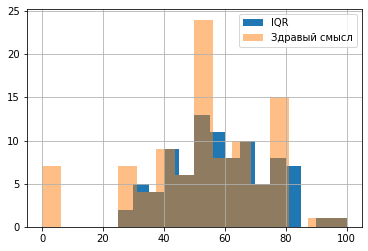

In [647]:
stud_2=stud_update

IQR = stud_2.score.quantile(0.75) - stud_2.score.quantile(0.25)
perc25 = stud_2.score.quantile(0.25)
perc75 = stud_2.score.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud_2.score.loc[stud_2.score.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 16, range = (20, 100), label = 'IQR')
 
stud_2.score.loc[stud_2.score <= 100].hist(
alpha = 0.5, bins = 16, range = (0, 100), label = 'Здравый смысл')
 
plt.legend();

stud_3 = stud_2.loc[stud_2.score <= 100]
stud_3

**3. Оцените количество уникальных значений для номинативных переменных.**

In [651]:
stud_2=stud_update


50.0    13
55.0    11
65.0    10
40.0     9
60.0     8
75.0     8
0.0      7
80.0     7
45.0     6
70.0     5
30.0     5
35.0     4
25.0     2
90.0     1
95.0     1
Name: score, dtype: int64

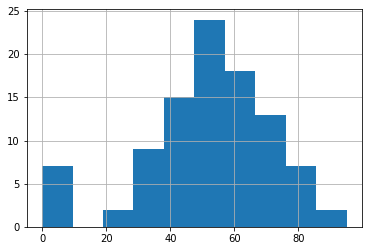

In [662]:
stud_2.score.hist()
stud_2.score.describe()
stud_2.score.value_counts()

0.0     26
4.0     16
2.0     13
6.0      8
10.0     5
8.0      4
5.0      3
16.0     3
3.0      3
15.0     2
18.0     2
14.0     2
9.0      2
28.0     1
17.0     1
26.0     1
12.0     1
1.0      1
20.0     1
40.0     1
7.0      1
Name: absences, dtype: int64

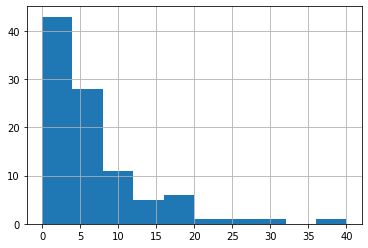

In [661]:
stud_2.absences.hist()
stud_2.absences.describe()
stud_2.absences.value_counts()

GP    80
MS    17
Name: school, dtype: int64

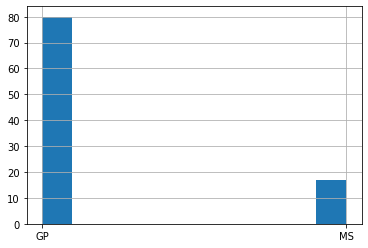

In [663]:
stud_2.school.hist()
stud_2.school.describe()
stud_2.school.value_counts()

F    55
M    42
Name: sex, dtype: int64

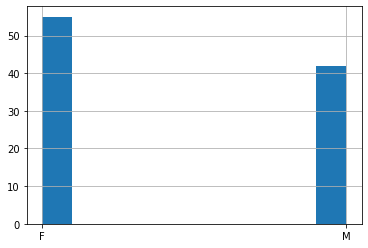

In [664]:
stud_2.sex.hist()
stud_2.sex.describe()
stud_2.sex.value_counts()

18    24
17    24
16    22
15    19
19     6
22     1
20     1
Name: age, dtype: int64

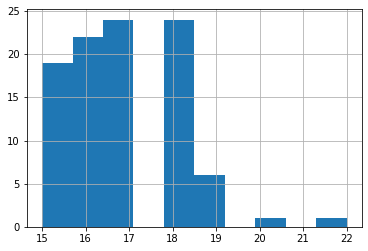

In [665]:
stud_2.age.hist()
stud_2.age.describe()
stud_2.age.value_counts()

U    73
R    24
Name: address, dtype: int64

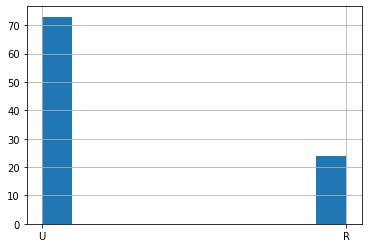

In [666]:
stud_2.address.hist()
stud_2.address.describe()
stud_2.address.value_counts()

GT3    66
LE3    31
Name: famsize, dtype: int64

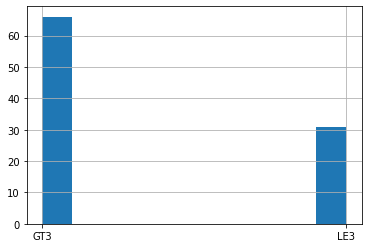

In [667]:
stud_2.famsize.hist()
stud_2.famsize.describe()
stud_2.famsize.value_counts()

T    86
A    11
Name: Pstatus, dtype: int64

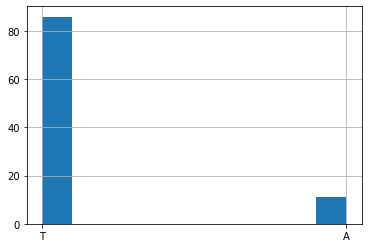

In [668]:
stud_2.Pstatus.hist()
stud_2.Pstatus.describe()
stud_2.Pstatus.value_counts()

4.0    36
2.0    26
3.0    25
1.0     9
0.0     1
Name: Medu, dtype: int64

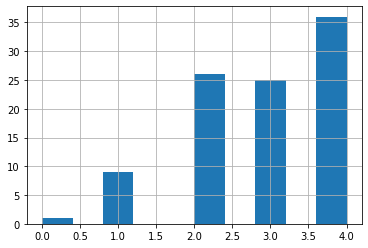

In [669]:
stud_2.Medu.hist()
stud_2.Medu.describe()
stud_2.Medu.value_counts()

2.0    28
4.0    25
3.0    24
1.0    20
Name: Fedu, dtype: int64

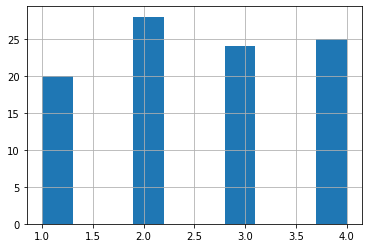

In [670]:
stud_2.Fedu.hist()
stud_2.Fedu.describe()
stud_2.Fedu.value_counts()

GT3    66
LE3    31
Name: famsize, dtype: int64

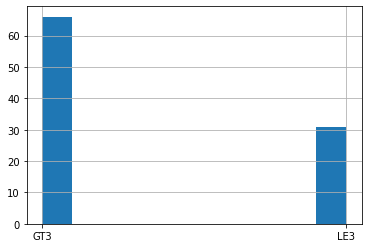

In [671]:
stud_2.famsize.hist()
stud_2.famsize.describe()
stud_2.famsize.value_counts()

other       38
services    23
teacher     14
at_home     12
health      10
Name: Mjob, dtype: int64

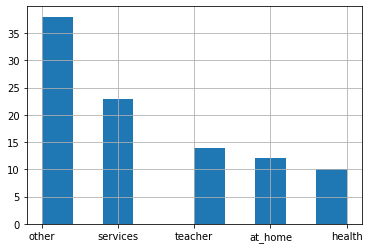

In [672]:
stud_2.Mjob.hist()
stud_2.Mjob.describe()
stud_2.Mjob.value_counts()

other       53
services    27
teacher      8
health       5
at_home      4
Name: Fjob, dtype: int64

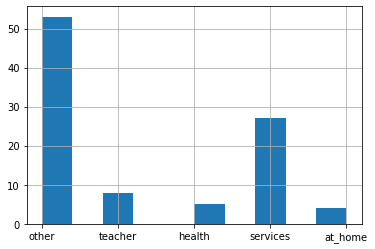

In [673]:
stud_2.Fjob.hist()
stud_2.Fjob.describe()
stud_2.Fjob.value_counts()

course        36
reputation    30
home          24
other          7
Name: reason, dtype: int64

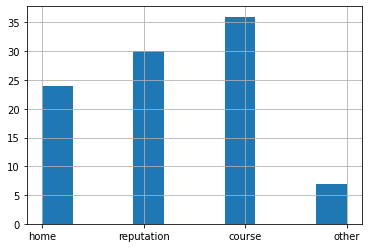

In [674]:
stud_2.reason.hist()
stud_2.reason.describe()
stud_2.reason.value_counts()

mother    68
father    21
other      8
Name: guardian, dtype: int64

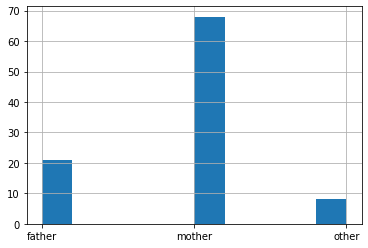

In [675]:
stud_2.guardian.hist()
stud_2.guardian.describe()
stud_2.guardian.value_counts()

2.0    46
1.0    24
3.0    19
4.0     8
Name: traveltime, dtype: int64

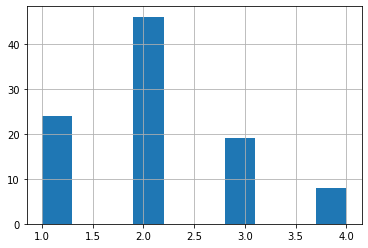

In [676]:
stud_2.traveltime.hist()
stud_2.traveltime.describe()
stud_2.traveltime.value_counts()

2.0    46
1.0    24
3.0    19
4.0     8
Name: studytime, dtype: int64

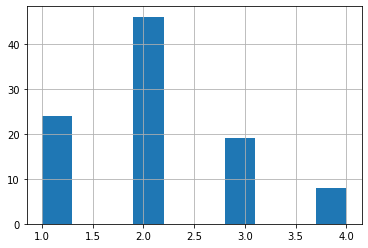

In [677]:
stud_2.studytime.hist()
stud_2.studytime.describe()
stud_2.studytime.value_counts()

-6.0     46
-3.0     24
-9.0     19
-12.0     8
Name: failures, dtype: int64

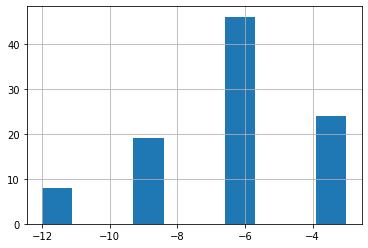

In [678]:
stud_2.failures.hist()
stud_2.failures.describe()
stud_2.failures.value_counts()

no     83
yes    14
Name: schoolsup, dtype: int64

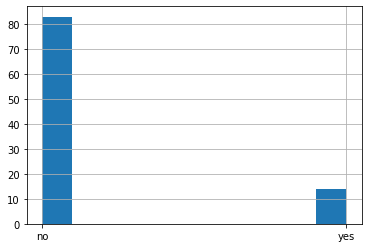

In [680]:
stud_2.schoolsup.hist()
stud_2.schoolsup.describe()
stud_2.schoolsup.value_counts()

yes    58
no     39
Name: famsup, dtype: int64

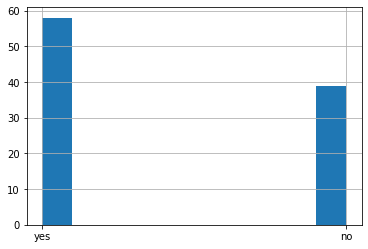

In [681]:
stud_2.famsup.hist()
stud_2.famsup.describe()
stud_2.famsup.value_counts()

no     49
yes    48
Name: paid, dtype: int64

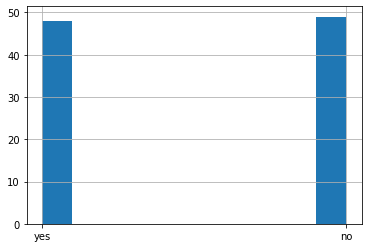

In [682]:
stud_2.paid.hist()
stud_2.paid.describe()
stud_2.paid.value_counts()

yes    52
no     45
Name: activities, dtype: int64

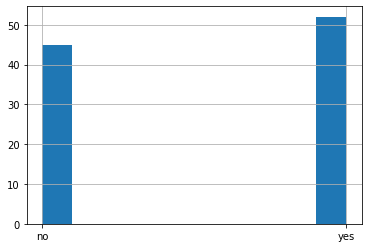

In [683]:
stud_2.activities.hist()
stud_2.activities.describe()
stud_2.activities.value_counts()

yes    78
no     19
Name: nursery, dtype: int64

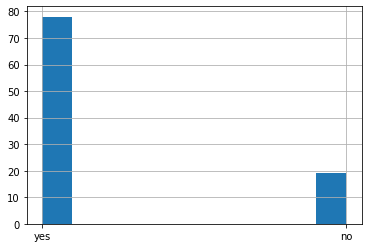

In [684]:
stud_2.nursery.hist()
stud_2.nursery.describe()
stud_2.nursery.value_counts()

-6.0     46
-3.0     24
-9.0     19
-12.0     8
Name: granular, dtype: int64

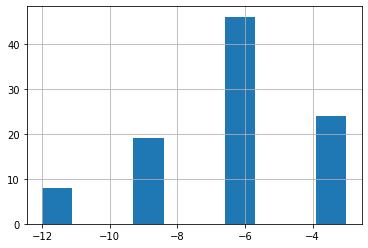

In [685]:
stud_2.granular.hist()
stud_2.granular.describe()
stud_2.granular.value_counts()

yes    94
no      3
Name: higher, dtype: int64

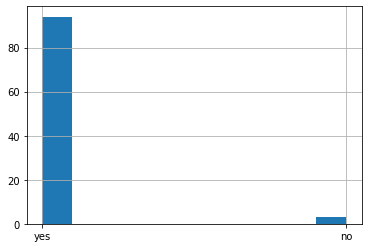

In [686]:
stud_2.higher.hist()
stud_2.higher.describe()
stud_2.higher.value_counts()

yes    84
no     13
Name: internet, dtype: int64

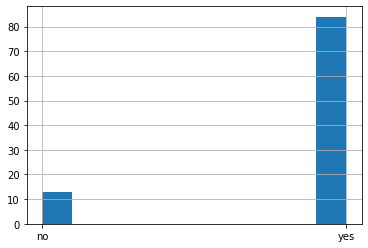

In [687]:
stud_2.internet.hist()
stud_2.internet.describe()
stud_2.internet.value_counts()

no     60
yes    37
Name: romantic, dtype: int64

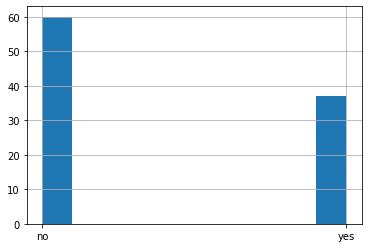

In [688]:
stud_2.romantic.hist()
stud_2.romantic.describe()
stud_2.romantic.value_counts()

4.0    50
5.0    24
3.0    16
2.0     5
1.0     2
Name: famrel, dtype: int64

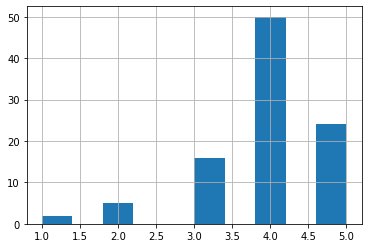

In [689]:
stud_2.famrel.hist()
stud_2.famrel.describe()
stud_2.famrel.value_counts()

4.0    34
3.0    32
2.0    14
5.0     9
1.0     8
Name: freetime, dtype: int64

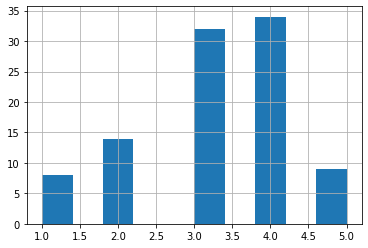

In [690]:
stud_2.freetime.hist()
stud_2.freetime.describe()
stud_2.freetime.value_counts()

3.0    33
2.0    27
4.0    22
5.0    10
1.0     5
Name: goout, dtype: int64

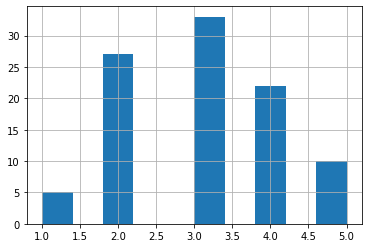

In [691]:
stud_2.goout.hist()
stud_2.goout.describe()
stud_2.goout.value_counts()

5.0    30
4.0    19
3.0    19
2.0    15
1.0    14
Name: health, dtype: int64

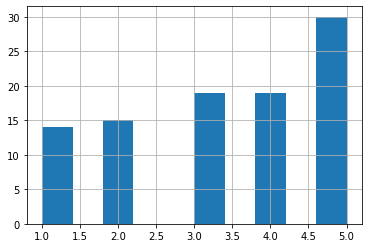

In [698]:
stud_2.health.hist()
stud_2.health.describe()
stud_2.health.value_counts()

**4. По необходимости преобразуйте данные.**

In [714]:
# удаление из датасета маловлияющих на SCORE критериев, в том числе
# - sex; - paid; - activities; - higher 

stud_3=stud_update
stud_3.drop(['sex'], inplace = True, axis = 1)

In [ ]:
stud_3.drop(['paid'], inplace = True, axis = 1)
stud_3.info()

In [ ]:
stud_3.drop(['higher'], inplace = True, axis = 1)
stud_3.info()

In [715]:
stud_3.drop(['activities'], inplace = True, axis = 1)
stud_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 4 to 391
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      97 non-null     object 
 1   age         97 non-null     int64  
 2   address     97 non-null     object 
 3   famsize     97 non-null     object 
 4   Pstatus     97 non-null     object 
 5   Medu        97 non-null     float64
 6   Fedu        97 non-null     float64
 7   Mjob        97 non-null     object 
 8   Fjob        97 non-null     object 
 9   reason      97 non-null     object 
 10  guardian    97 non-null     object 
 11  traveltime  97 non-null     float64
 12  studytime   97 non-null     float64
 13  failures    97 non-null     float64
 14  schoolsup   97 non-null     object 
 15  famsup      97 non-null     object 
 16  nursery     97 non-null     object 
 17  granular    97 non-null     float64
 18  internet    97 non-null     object 
 19  romantic    97 non-null     ob

In [716]:
#записываем датасет для следующего анализа
#сохраняем резервную копию датасета в stud_analyse

stud_analyse=stud_3
#display(stud_analyse.head(5))
stud_analyse.describe()
stud_analyse.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 4 to 391
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      97 non-null     object 
 1   age         97 non-null     int64  
 2   address     97 non-null     object 
 3   famsize     97 non-null     object 
 4   Pstatus     97 non-null     object 
 5   Medu        97 non-null     float64
 6   Fedu        97 non-null     float64
 7   Mjob        97 non-null     object 
 8   Fjob        97 non-null     object 
 9   reason      97 non-null     object 
 10  guardian    97 non-null     object 
 11  traveltime  97 non-null     float64
 12  studytime   97 non-null     float64
 13  failures    97 non-null     float64
 14  schoolsup   97 non-null     object 
 15  famsup      97 non-null     object 
 16  nursery     97 non-null     object 
 17  granular    97 non-null     float64
 18  internet    97 non-null     object 
 19  romantic    97 non-null     ob

**5. Проведите корреляционный анализ количественных переменных.**

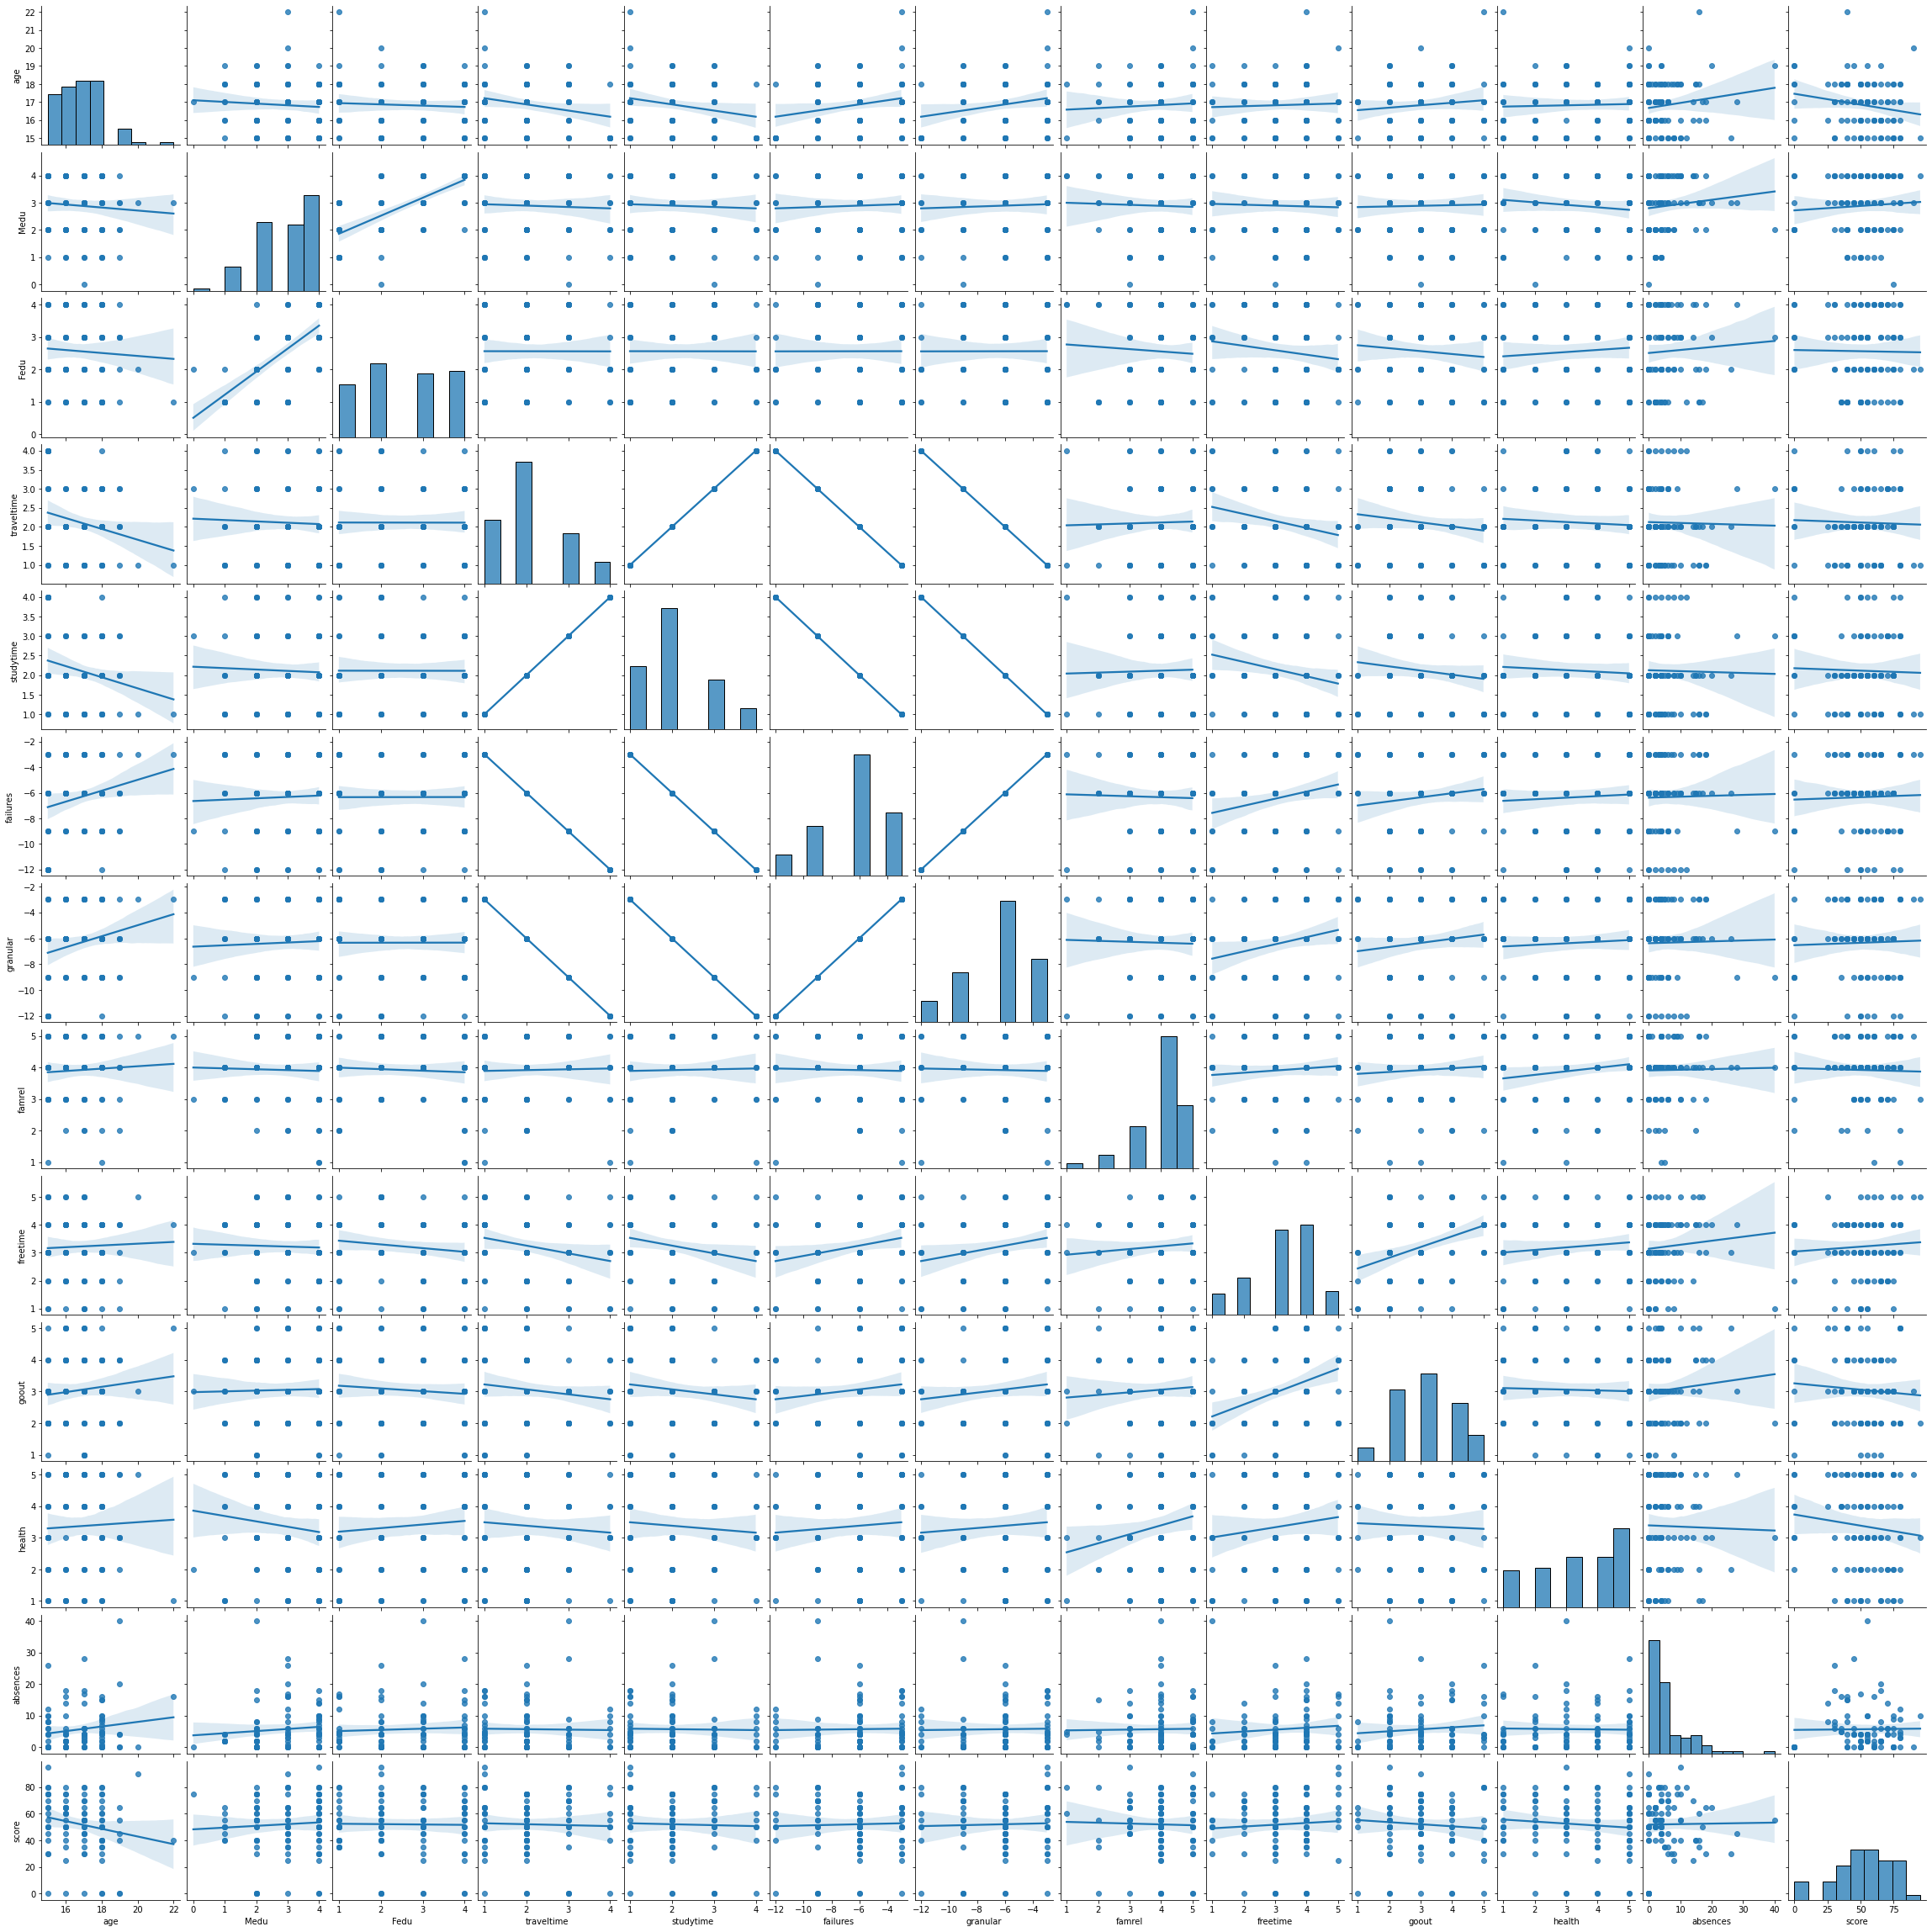

In [717]:
stud_4=stud_3

sns.pairplot(stud_4, kind = 'reg')

In [718]:
stud_4.corr()

,age,Medu,Fedu,traveltime,studytime,failures,granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.071662,-0.056929,-0.220209,-0.220209,0.220209,0.220209,0.057039,0.040115,0.106748,0.037152,0.142780,-0.186407
Medu,-0.071662,1.000000,0.684379,-0.042491,-0.042491,0.042491,0.042491,-0.032146,-0.032350,0.023938,-0.124250,0.101253,0.064914
Fedu,-0.056929,0.684379,1.000000,-0.001350,-0.001350,0.001350,0.001350,-0.059084,-0.135575,-0.087894,0.086575,0.059172,-0.014236
traveltime,-0.220209,-0.042491,-0.001350,1.000000,1.000000,-1.000000,-1.000000,0.025253,-0.226503,-0.129162,-0.067115,-0.018695,-0.029742
studytime,-0.220209,-0.042491,-0.001350,1.000000,1.000000,-1.000000,-1.000000,0.025253,-0.226503,-0.129162,-0.067115,-0.018695,-0.029742
failures,0.220209,0.042491,0.001350,-1.000000,-1.000000,1.000000,1.000000,-0.025253,0.226503,0.129162,0.067115,0.018695,0.029742
granular,0.220209,0.042491,0.001350,-1.000000,-1.000000,1.000000,1.000000,-0.025253,0.226503,0.129162,0.067115,0.018695,0.029742
famrel,0.057039,-0.032146,-0.059084,0.025253,0.025253,-0.025253,-0.025253,1.000000,0.084336,0.069922,0.178145,0.016312,-0.026742
freetime,0.040115,-0.032350,-0.135575,-0.226503,-0.226503,0.226503,0.226503,0.084336,1.000000,0.381049,0.120714,0.093512,0.068862
goout,0.106748,0.023938,-0.087894,-0.129162,-0.129162,0.129162,0.129162,0.069922,0.381049,1.000000,-0.033206,0.094859,-0.079187


**6. Отберите не коррелирующие переменные.**

In [720]:
#удаляем полностью скоррелированные переменные granular, studytime, failures:

stud_4.drop(['granular', 'studytime', 'failures'], inplace = True, axis = 1)
stud_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 4 to 391
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      97 non-null     object 
 1   age         97 non-null     int64  
 2   address     97 non-null     object 
 3   famsize     97 non-null     object 
 4   Pstatus     97 non-null     object 
 5   Medu        97 non-null     float64
 6   Fedu        97 non-null     float64
 7   Mjob        97 non-null     object 
 8   Fjob        97 non-null     object 
 9   reason      97 non-null     object 
 10  guardian    97 non-null     object 
 11  traveltime  97 non-null     float64
 12  schoolsup   97 non-null     object 
 13  famsup      97 non-null     object 
 14  nursery     97 non-null     object 
 15  internet    97 non-null     object 
 16  romantic    97 non-null     object 
 17  famrel      97 non-null     float64
 18  freetime    97 non-null     float64
 19  goout       97 non-null     fl

In [721]:
stud_4.corr()

,age,Medu,Fedu,traveltime,famrel,freetime,goout,health,absences,score
age,1.000000,-0.071662,-0.056929,-0.220209,0.057039,0.040115,0.106748,0.037152,0.142780,-0.186407
Medu,-0.071662,1.000000,0.684379,-0.042491,-0.032146,-0.032350,0.023938,-0.124250,0.101253,0.064914
Fedu,-0.056929,0.684379,1.000000,-0.001350,-0.059084,-0.135575,-0.087894,0.086575,0.059172,-0.014236
traveltime,-0.220209,-0.042491,-0.001350,1.000000,0.025253,-0.226503,-0.129162,-0.067115,-0.018695,-0.029742
famrel,0.057039,-0.032146,-0.059084,0.025253,1.000000,0.084336,0.069922,0.178145,0.016312,-0.026742
freetime,0.040115,-0.032350,-0.135575,-0.226503,0.084336,1.000000,0.381049,0.120714,0.093512,0.068862
goout,0.106748,0.023938,-0.087894,-0.129162,0.069922,0.381049,1.000000,-0.033206,0.094859,-0.079187
health,0.037152,-0.124250,0.086575,-0.067115,0.178145,0.120714,-0.033206,1.000000,-0.019866,-0.103462
absences,0.142780,0.101253,0.059172,-0.018695,0.016312,0.093512,0.094859,-0.019866,1.000000,0.012502
score,-0.186407,0.064914,-0.014236,-0.029742,-0.026742,0.068862,-0.079187,-0.103462,0.012502,1.000000


- слабоскоррелированные переменные: 
-- Fedu
-- famrel
-- absences

- прочие параметры, влияющие на score:
-- age
-- health
-- Medu

- полностью скоррелированные (удаляем granular, studytime, failures, freetime):
-- traveltime
-- studytime
-- failures
-- granular
-- freetime
-- goout

**7. Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).**

In [727]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_4.loc[stud_4.loc[:, column].isin(stud_4.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

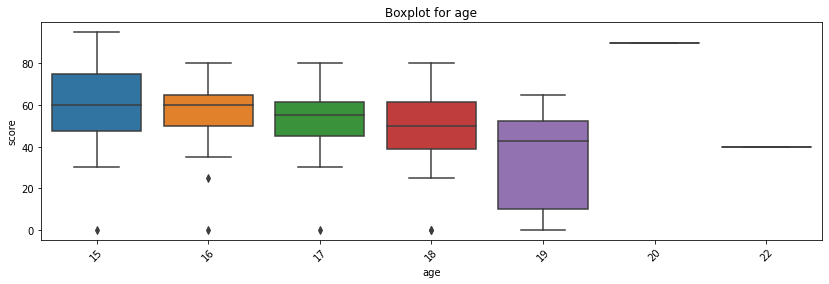

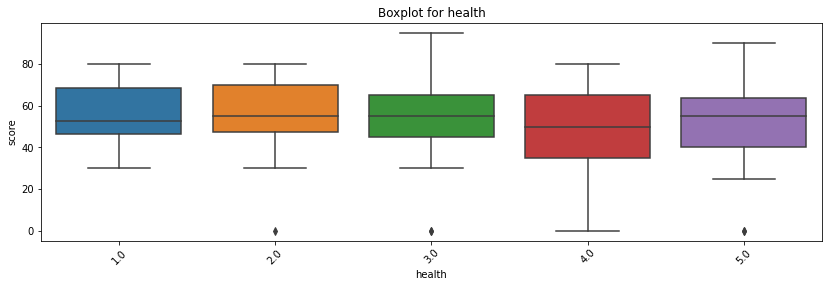

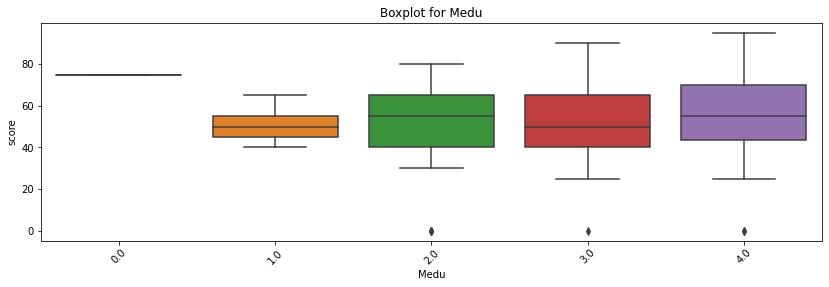

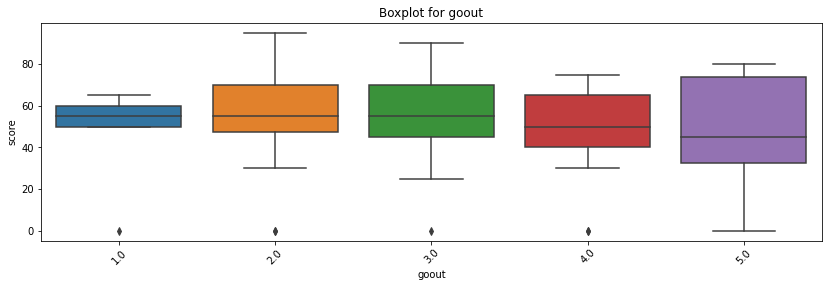

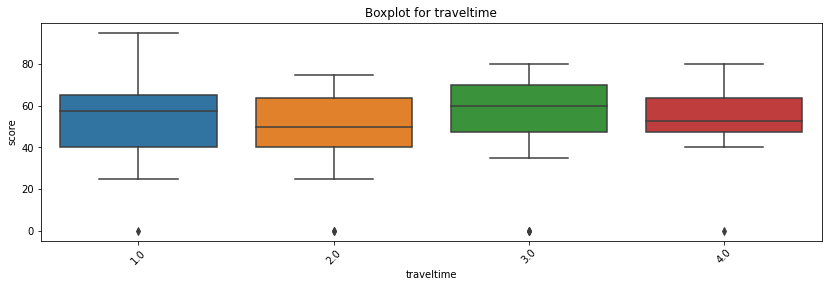

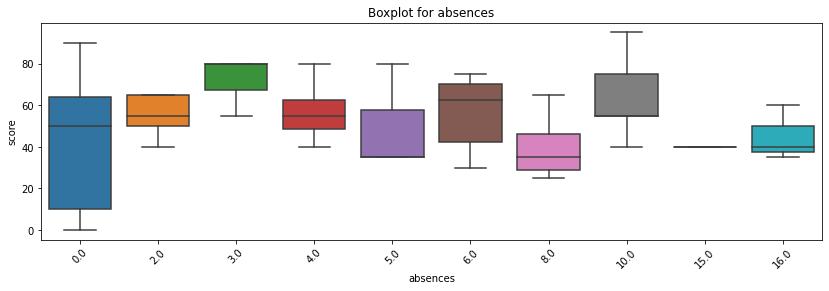

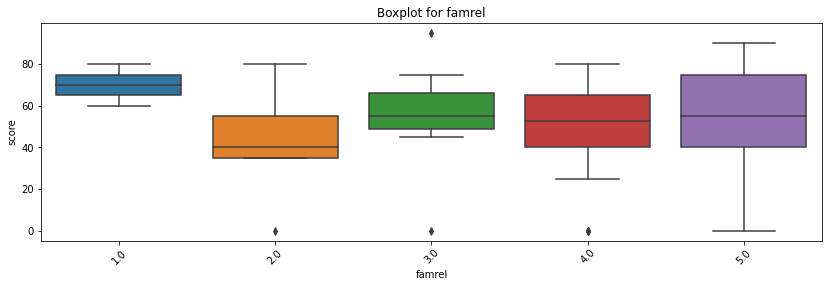

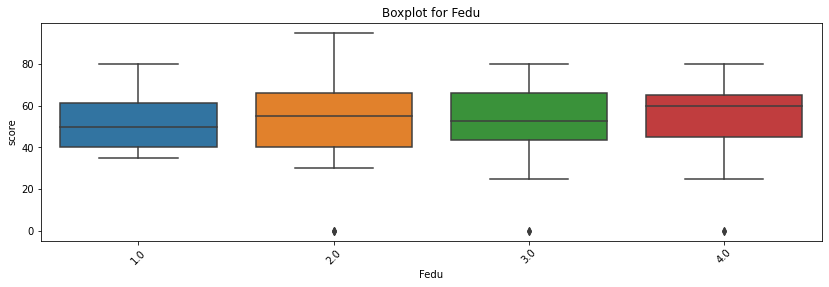

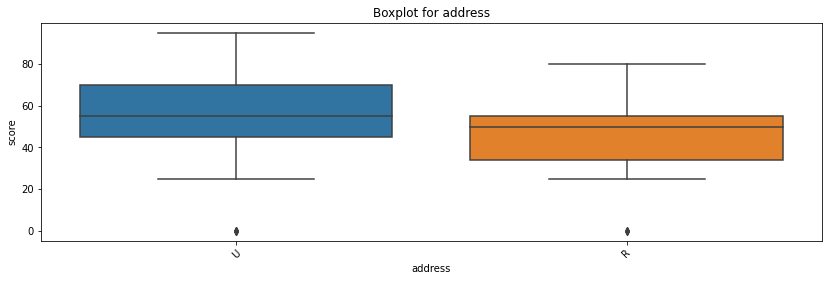

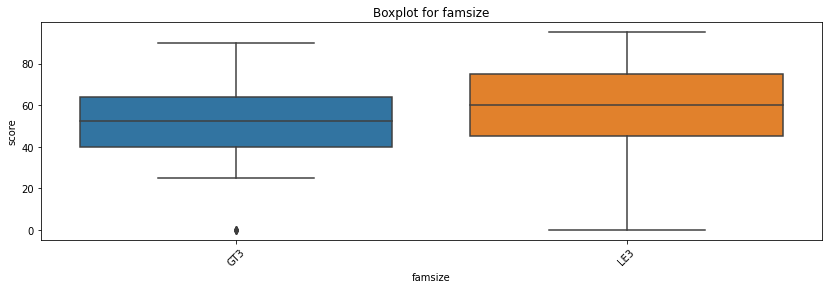

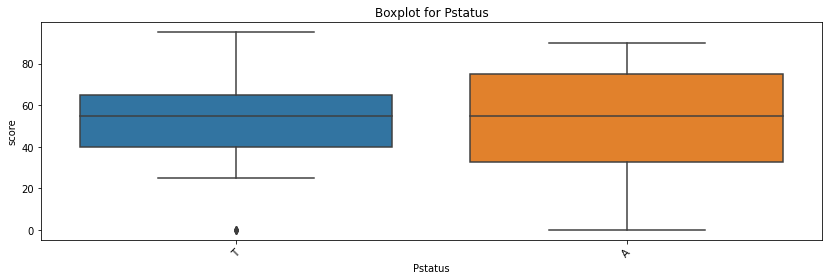

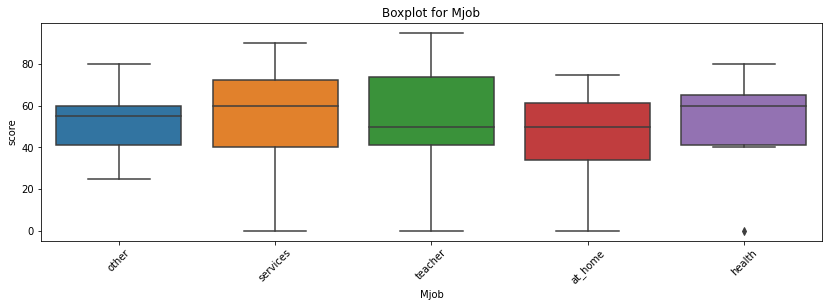

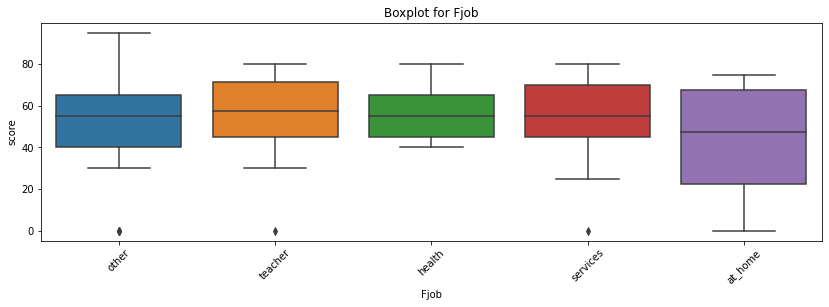

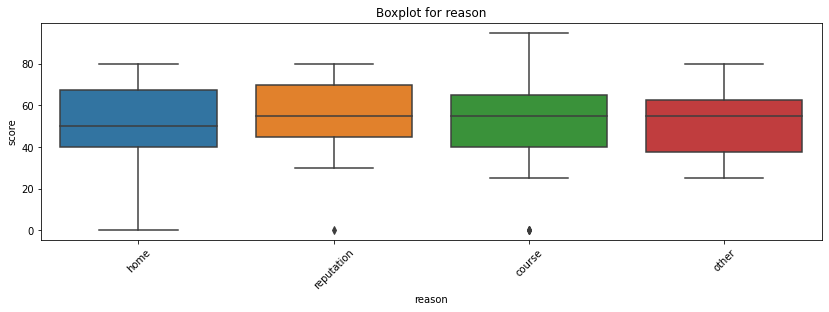

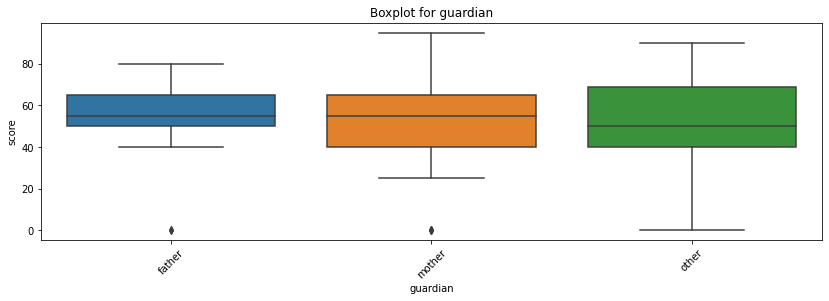

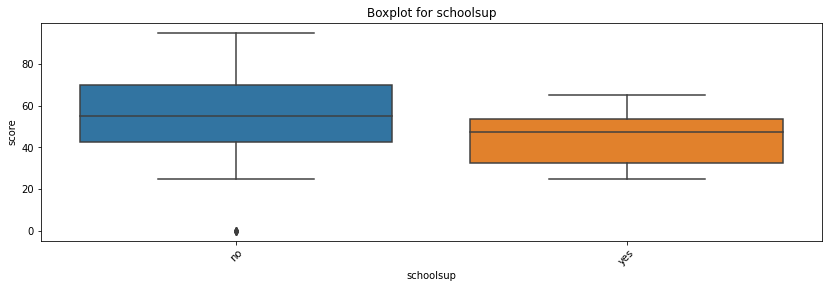

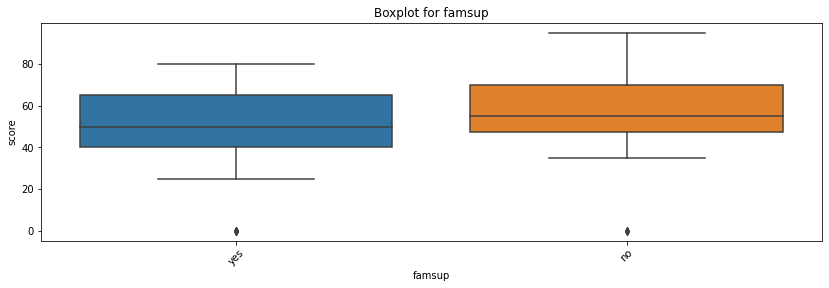

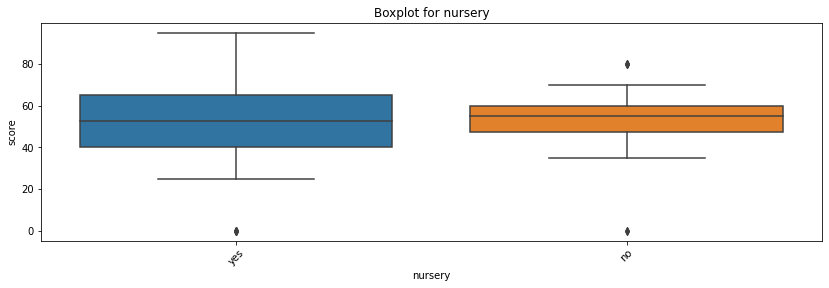

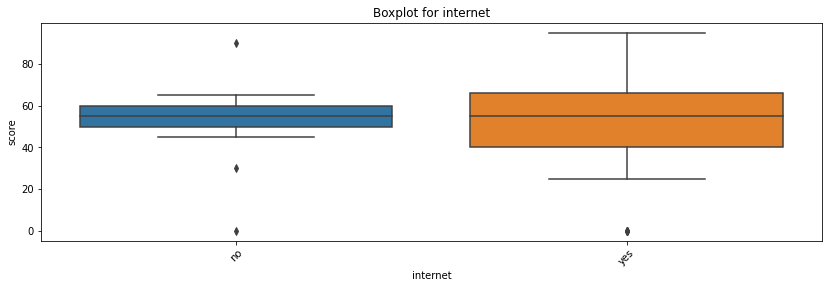

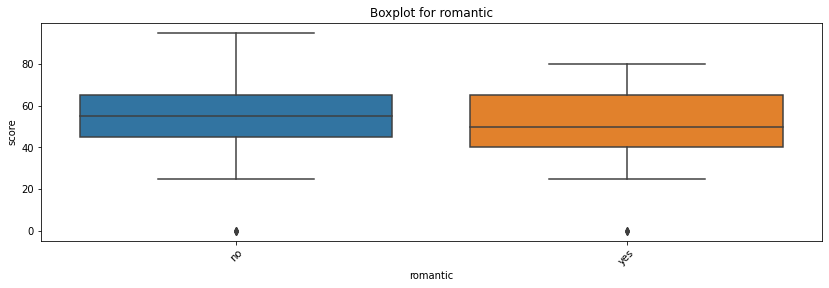

In [763]:
#используем для анализа все переменные, оставшиеся в датасете - 21 переменные, в том числе переменная score
for col in ['age', 'health', 'Medu', 'goout', 'traveltime','absences','famrel','Fedu',
            'address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup',
            'nursery','internet','romantic']:
    get_boxplot(col)

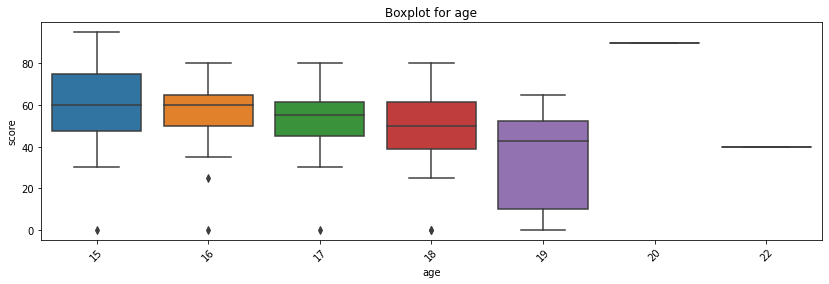

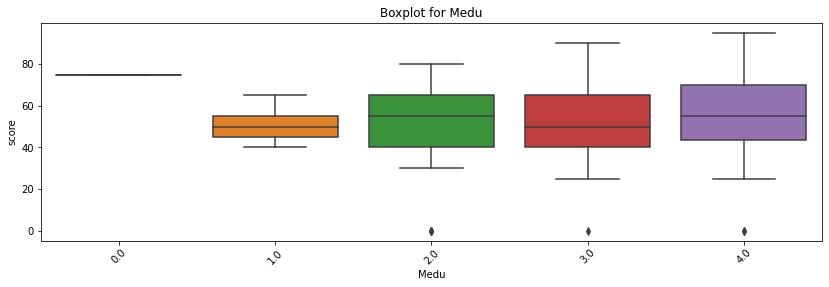

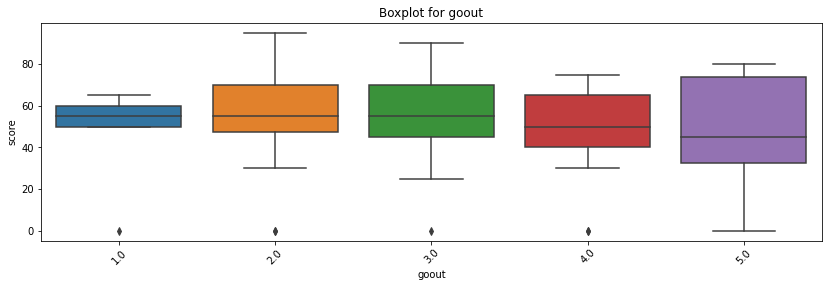

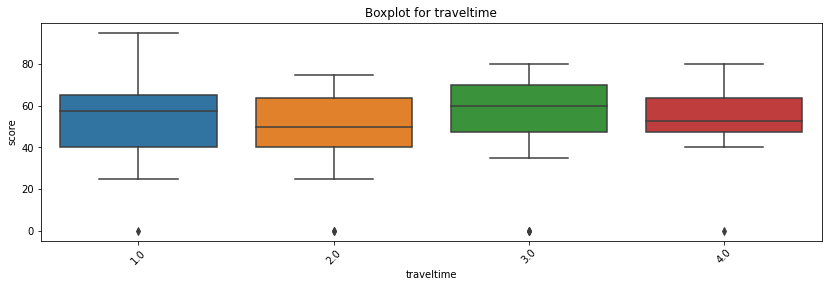

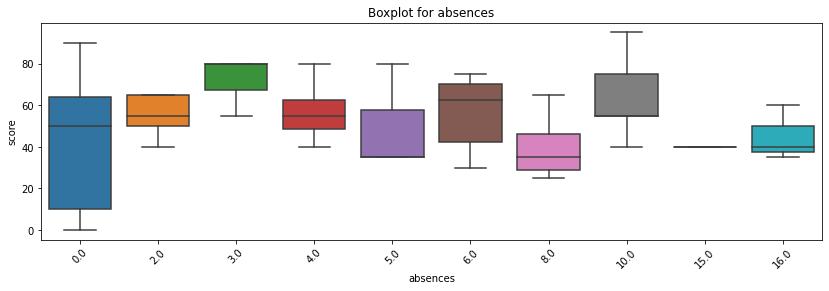

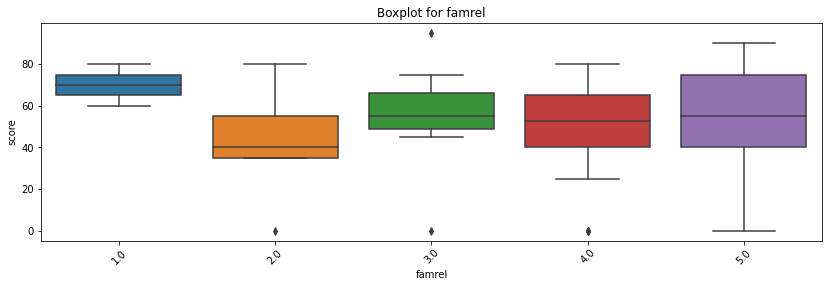

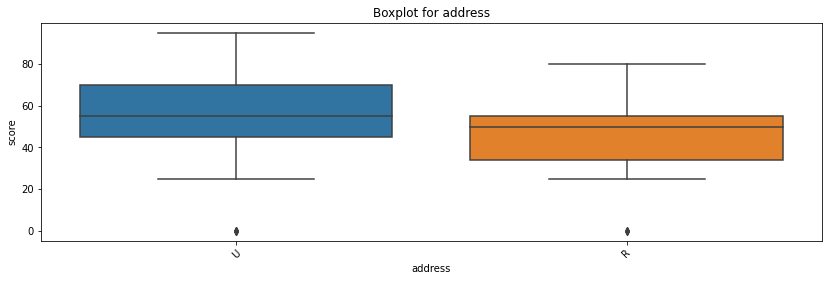

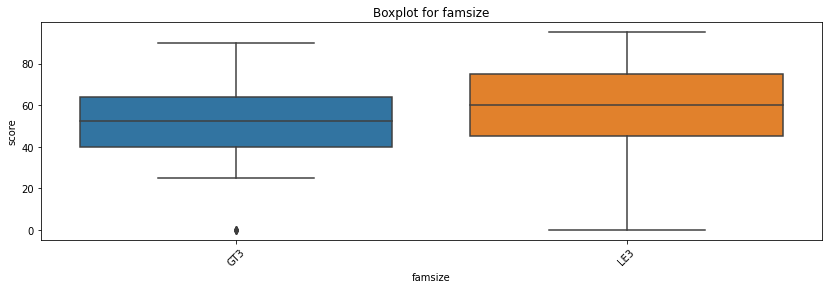

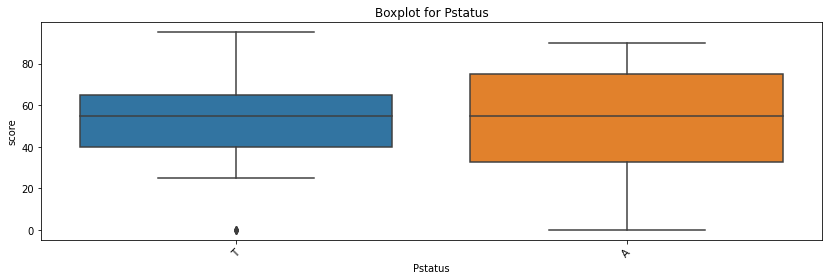

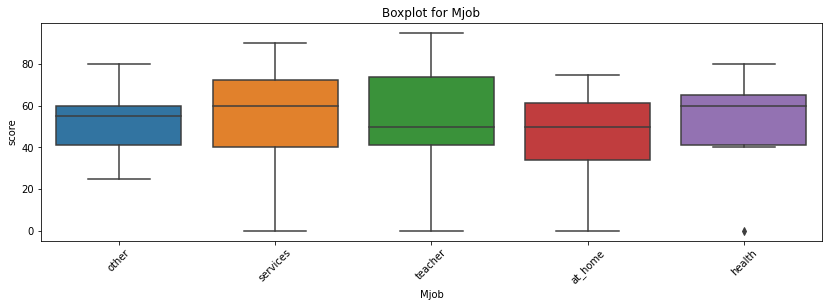

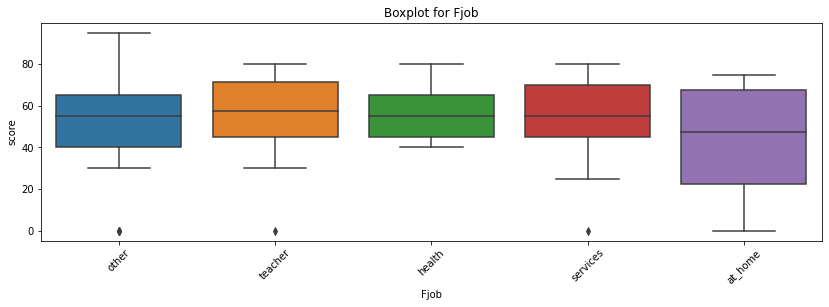

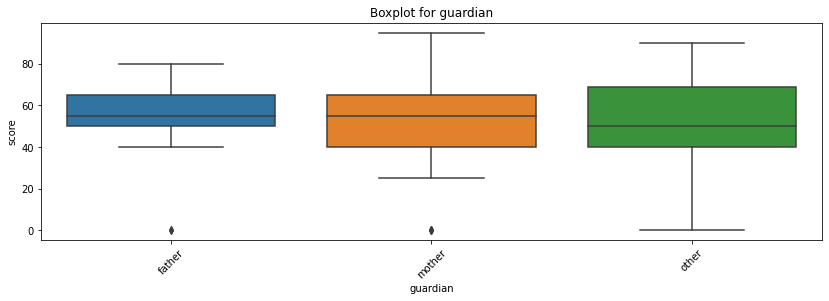

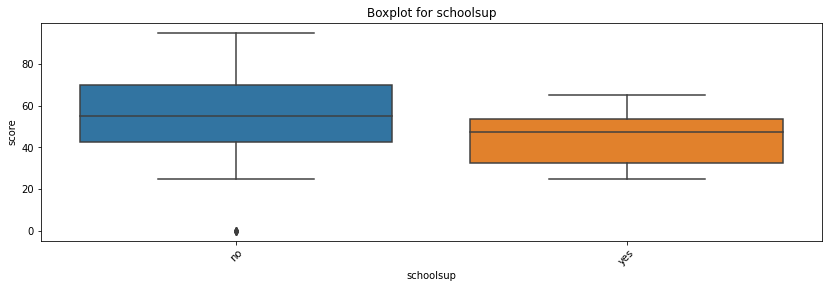

In [764]:
#используем для анализа только влияющие переменные, оставшиеся в датасете - 13 переменных, без учёта переменной score
for col in ['age', 'Medu', 'goout', 'traveltime','absences','famrel',
            'address','famsize','Pstatus','Mjob','Fjob','guardian','schoolsup']:
    get_boxplot(col)

Проверка нулевой гипотезы

In [754]:
def get_stat_dif(column):
  cols = stud_4.loc[:, column].value_counts().index[:10]
  combinations_all = list(combinations(cols, 2))
  for comb in combinations_all:
    if ttest_ind(stud_4.loc[stud_4.loc[:, column] == comb[0], 'score'],
              stud_4.loc[stud_4.loc[:, column] == comb[1], 'score']).pvalue \
      <= 0.05/len(combinations_all): # Учли поправку Бонферони
      print('Найдены статистически значимые различия для колонки', column)
      break

In [765]:
for col in ['age', 'Medu', 'goout', 'traveltime','absences','famrel',
            'address','famsize','Pstatus','Mjob','Fjob','guardian','schoolsup']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки famsize


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 

По полученным результатам статистически значимые параметры: address и famsize.

Используем данные два параметра для построения модели, а также параметры из предыдущего анализа:
- famrel
- absences
- age
- Medu
- goout

In [766]:
stud_for_model = stud_4.loc[:, ['address', 'famsize', 'famrel', 'absences', 'age','Medu','freetime']]
display(stud_for_model.head())
display(stud_for_model.tail())

,address,famsize,famrel,absences,age,Medu,freetime
4,U,GT3,4.0,4.0,16,3.0,3.0
5,U,LE3,5.0,10.0,16,4.0,4.0
7,U,GT3,4.0,6.0,17,4.0,1.0
10,U,GT3,3.0,0.0,15,4.0,3.0
14,U,GT3,4.0,0.0,15,2.0,5.0


,address,famsize,famrel,absences,age,Medu,freetime
381,R,GT3,4.0,5.0,18,2.0,4.0
386,R,GT3,4.0,7.0,18,4.0,4.0
387,R,GT3,5.0,0.0,19,2.0,4.0
388,U,LE3,4.0,0.0,18,3.0,3.0
391,U,LE3,2.0,3.0,17,3.0,4.0


8. Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

**ВЫВОДЫ по проекту.**

1. В исходном датасете исправлены опечатки

2. В исходном датасете проведен анализ на наличие незаполненных полей. В результате размер датасета сокращен с 395 до 97 строк. Т.к. при наличии незаполненных полей по любому из критериев, за исключением 'school','age','sex'(в  исходном датасете эти поля заполнены полностью), выполнение последующего анализа и построение модели не имеет смысла.

3. При определении межквартильного размаха из распределения видно, что есть выбросы. Эти выбросы могут являться предметом анализа и основой построения модели. Диапазон, в котором данные представляют интерес, от 40 до 80. 

4. Первичный анализ данных показывает:
- имеется достаточно высокое число пропусков absences - 27% случаев от оставшегося количества данных в датасете (общее число оставшихся данных 97);
- при 100-балльной шкале оценивания, около 43% набрали от 50 до 65 баллов. Выясним из-за чего такой высокий процент набравших среднюю оценку: 50-65 баллов.
- школа GP насчитывает наибольшее количество школьников в датасете - 82%. На этой выборке, для школы GP можно посмотреть влияние разных факторов на набранные баллы;
- показатель "sex" является второстепенным, т.к. примерно одинаовое соотношение F и M в датасете. В принципе, можно удалить столбец;
- целевая возрастная аудитория для анализа - школьники от 15 до 18 лет, т.е. тинэйджеры; их количество в датасете около 92%; ВАЖНЫЙ ПАРАМЕТР
- у большинства школьников в датасете отсутствует дополнительная образовательная поддержка (schoolsup, около 85,5%. ВАЖНЫЙ ПАРАМЕТР
- критерий famsup - имеет среднюю значимость и, скорее всего, не существенно влияет на оценки score
- критерий paid - второстепенный и можно удалить столбец;
- критерий activities - второстепенный и можно удалить столбец;
- критерий higher - большинство школьников планируют получить высшее образование, но уровень успеваемости говорит о низкой готовности, т.е. само желание не мотивирует к учебе и не способствует учебе; можно удалить столбец;
- критерий freetime - по всей видимости существенный параметр, т.к. около 82% школьников имеют достаточно свободного времени после учебы; 
- критерий goout - по всей видимости взаимосвязан с freetime
- критерий health - около 30% школьников оценивает своё состояние здоровье как плохо либо близкое к плохо; это коррелирует с значением критерия absences и, отчасти, может быть причиной низких оценок.

5. Столбцы на удаление из датасета перед коррекляционным анализом:
- sex
- paid
- activities
- higher 

6. На основании корреляционного анализа можно сделать следующие выводы:
- слабоскоррелированные переменные: 
-- Fedu
-- famrel
-- absences

- полностью скоррелированные (удаляем granular, studytime, failures, freetime):
-- traveltime
-- studytime
-- failures
-- granular
-- freetime
-- goout

- прочие параметры, влияющие на score:
-- age
-- health
-- Medu

7. Анализ номинативных переменных:
- первый анализ показывает какие переменные не влияют на предсказываемую величину, а именно:
-- health
-- Fedu
-- reason
-- famsup
-- nursery
-- internet
-- romantic

- проверка нулевой гипотезы показывает, что статистически значимые переменные: address и famsize

- также возмонжное влияние имеют переменные: famrel, absences, age, Medu, goout

Для модели будем использовать 7 переменных.

8. Итоговые выводы:
- датасет содержал достаточно большое количество пустых значений: из 395 строк сохранились 97, которые и были использованы для анализа данных
- датасет содержал опечатки - исправлено
- корреляционный анализ показывает, что значимые переменные имеют как положительное значение, так и отрицательное; точную оценку изменению знака дать затруднительно
- самые важные параметры: address, famsize, famrel, absences, age, Medu, goout